In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pl

In [10]:
# Load the dataset
file_path =  r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

In [11]:
print(data.columns)

Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant center-based price as share of family income: 2018 (%)',
       'Infant home-based price: 2018 ($)',
       'Infant home-based price as share of family income: 2018 (%)',
       'Toddler center-based price: 2018 ($)',
       'Toddler center-based price as share of family income: 2018 (%)',
       'Toddler home-based price: 2018 ($)',
       'Toddler home-based price as share of family income: 2018 (%)',
       'Preschool center-based price: 2018 ($)',
       'Preschool center-based price as share of family income: 2018 (%)',
       'Preschool home-based price: 2018 ($)',
       'Preschool home-based price as share of family income: 2018 (%)',
       'School-age center-based price: 2018 ($)',
       'School-age center-based price as share of family income: 2018 (%)',
       'School-age home-based price: 2018 ($)',
       'School-age home-based pri

In [12]:

# Calculate the average cost for each type of care
average_costs = {
    'Infant center-based': data['Infant center-based price: 2018 ($)'].mean(),
    'Infant home-based': data['Infant home-based price: 2018 ($)'].mean(),
    'Toddler center-based': data['Toddler center-based price: 2018 ($)'].mean(),
    'Toddler home-based': data['Toddler home-based price: 2018 ($)'].mean(),
    'Preschool center-based': data['Preschool center-based price: 2018 ($)'].mean(),
    'Preschool home-based': data['Preschool home-based price: 2018 ($)'].mean(),
    'School-age center-based': data['School-age center-based price: 2018 ($)'].mean(),
    'School-age home-based': data['School-age home-based price: 2018 ($)'].mean(),
}

In [13]:
# Calculate the average percentage of income for each type of care
average_income_percentage = {
    'Infant center-based': data['Infant center-based price as share of family income: 2018 (%)'].mean(),
    'Infant home-based': data['Infant home-based price as share of family income: 2018 (%)'].mean(),
    'Toddler center-based': data['Toddler center-based price as share of family income: 2018 (%)'].mean(),
    'Toddler home-based': data['Toddler home-based price as share of family income: 2018 (%)'].mean(),
    'Preschool center-based': data['Preschool center-based price as share of family income: 2018 (%)'].mean(),
    'Preschool home-based': data['Preschool home-based price as share of family income: 2018 (%)'].mean(),
    'School-age center-based': data['School-age center-based price as share of family income: 2018 (%)'].mean(),
    'School-age home-based': data['School-age home-based price as share of family income: 2018 (%)'].mean(),
}

In [23]:
# Identify the care type with the highest cost
highest_cost_type = max(average_costs, key=average_costs.get)

# Calculate the average cost for each type of care by county size
average_costs_by_county_size = data.groupby('County Size').mean().filter(like='price: 2018 ($)')

# Calculate the average cost for each type of care by region
average_costs_by_region = data.groupby('Region').mean().filter(like='price: 2018 ($)')

In [24]:
# Create DataFrames for each result
average_costs_df = pd.DataFrame(list(average_costs.items()), columns=['Type of Care', 'Average Cost'])
average_income_percentage_df = pd.DataFrame(list(average_income_percentage.items()), columns=['Type of Care', 'Average % of Income'])
highest_cost_df = pd.DataFrame({'Type of Care': [highest_cost_type], 'Highest Average Cost': [average_costs[highest_cost_type]]})
average_costs_by_county_size_df = average_costs_by_county_size.reset_index()
average_costs_by_region_df = average_costs_by_region.reset_index()

In [25]:
# Save the results to an Excel file
with pd.ExcelWriter(r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\\Childcare_Cost_Analysis_2018.xlsx') as writer:
    average_costs_df.to_excel(writer, sheet_name='Average Costs', index=False)
    average_income_percentage_df.to_excel(writer, sheet_name='Average % of Income', index=False)
    highest_cost_df.to_excel(writer, sheet_name='Highest Cost', index=False)
    average_costs_by_county_size_df.to_excel(writer, sheet_name='Costs by County Size', index=False)
    average_costs_by_region_df.to_excel(writer, sheet_name='Costs by Region', index=False)

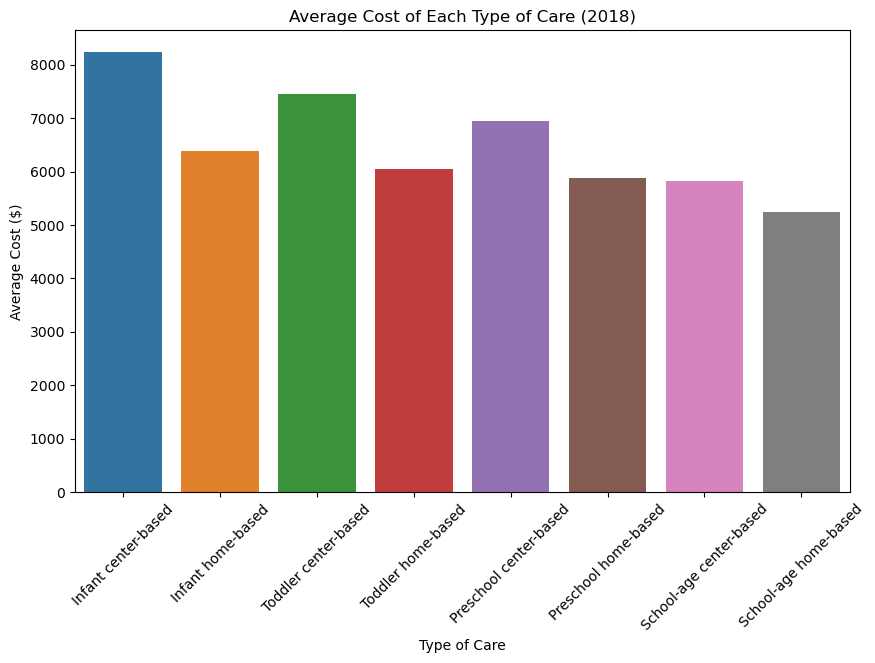

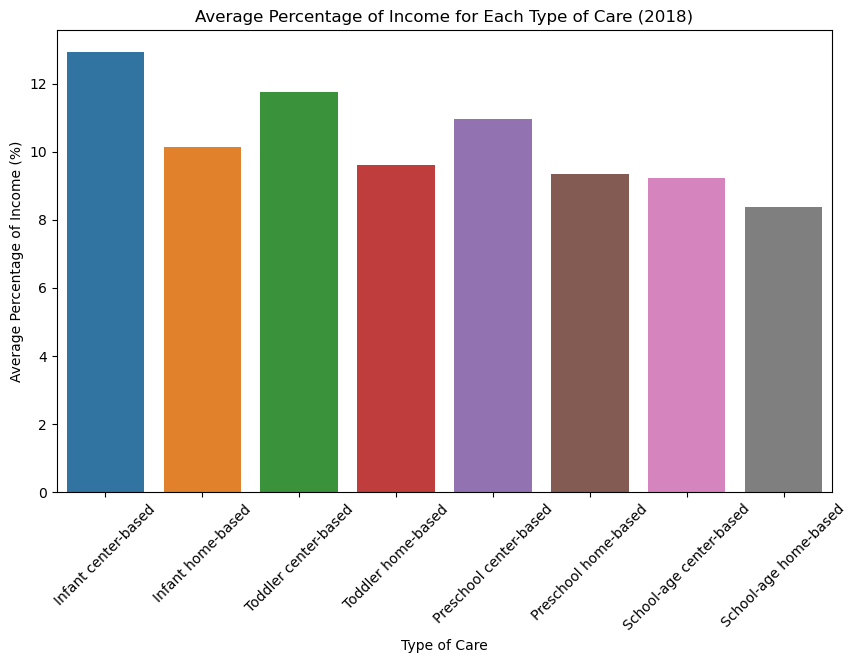

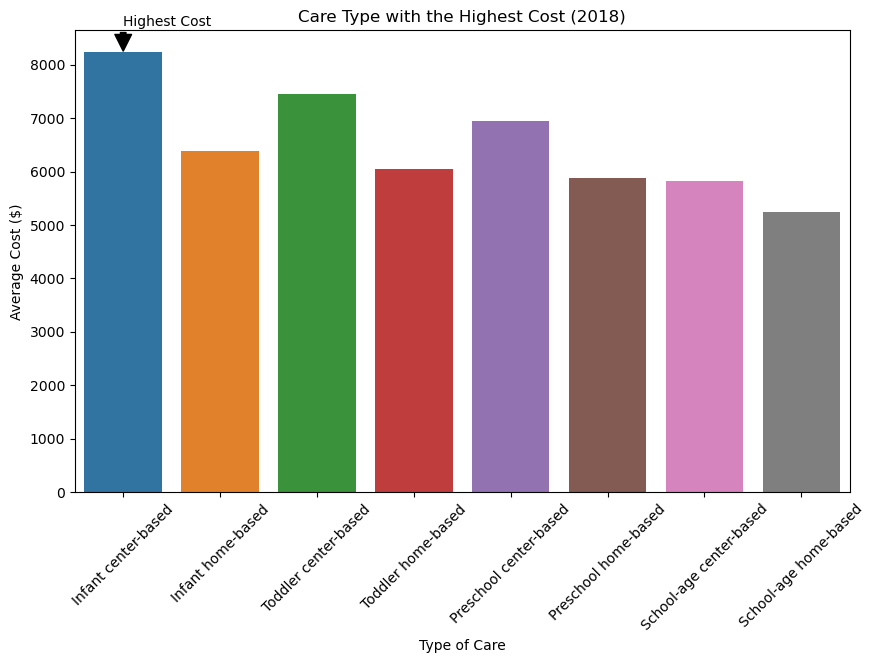

<Figure size 1500x1000 with 0 Axes>

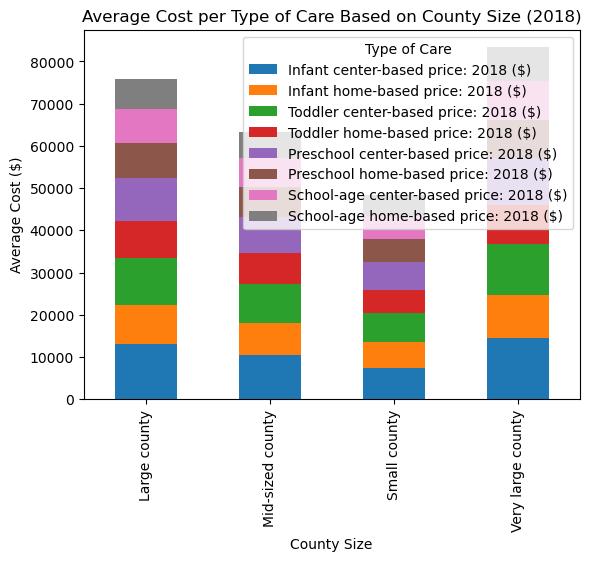

<Figure size 1000x600 with 0 Axes>

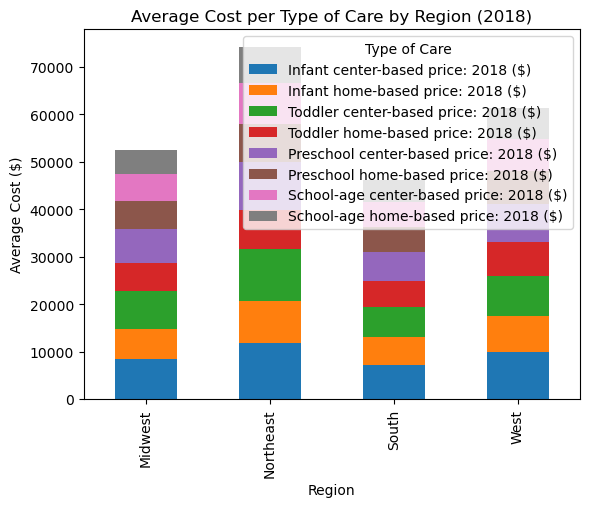

In [26]:
# 1. Average cost of each type of care
plt.figure(figsize=(10, 6))
sns.barplot(x=average_costs_df['Type of Care'], y=average_costs_df['Average Cost'])
plt.title('Average Cost of Each Type of Care (2018)')
plt.ylabel('Average Cost ($)')
plt.xticks(rotation=45)
plt.show()

# 2. Average percentage of income for each type of care
plt.figure(figsize=(10, 6))
sns.barplot(x=average_income_percentage_df['Type of Care'], y=average_income_percentage_df['Average % of Income'])
plt.title('Average Percentage of Income for Each Type of Care (2018)')
plt.ylabel('Average Percentage of Income (%)')
plt.xticks(rotation=45)
plt.show()

# 3. Care type with the highest cost
plt.figure(figsize=(10, 6))
sns.barplot(x=average_costs_df['Type of Care'], y=average_costs_df['Average Cost'])
plt.title('Care Type with the Highest Cost (2018)')
plt.ylabel('Average Cost ($)')
plt.xticks(rotation=45)
plt.annotate('Highest Cost', xy=(average_costs_df['Type of Care'].tolist().index(highest_cost_type), average_costs[highest_cost_type]),
             xytext=(average_costs_df['Type of Care'].tolist().index(highest_cost_type), average_costs[highest_cost_type] + 500),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# 4. Average cost per type of care based on county size
plt.figure(figsize=(15, 10))
average_costs_by_county_size_df.plot(kind='bar', stacked=True, x='County Size')
plt.title('Average Cost per Type of Care Based on County Size (2018)')
plt.ylabel('Average Cost ($)')
plt.xlabel('County Size')
plt.xticks(rotation=90)
plt.legend(title='Type of Care')
plt.show()

# 5. Average cost per type of care by region
plt.figure(figsize=(10, 6))
average_costs_by_region_df.plot(kind='bar', stacked=True, x='Region')
plt.title('Average Cost per Type of Care by Region (2018)')
plt.ylabel('Average Cost ($)')
plt.xlabel('Region')
plt.legend(title='Type of Care')
plt.show()

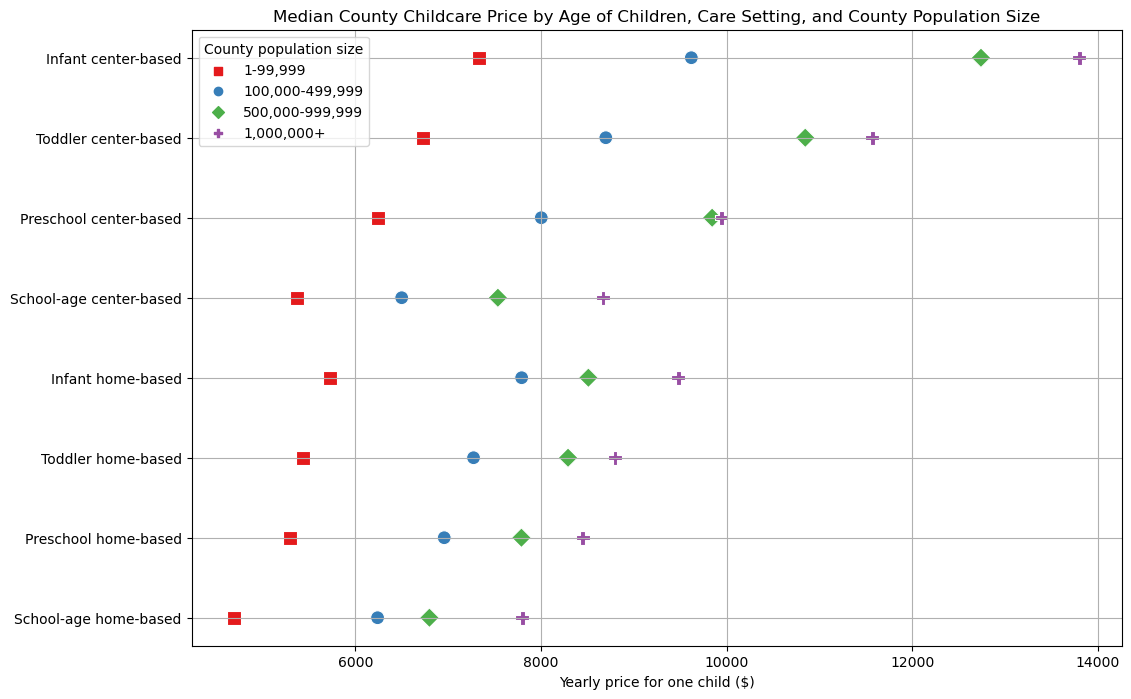

In [27]:
# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Prepare the data for plotting
care_types = ['Infant center-based', 'Toddler center-based', 'Preschool center-based', 'School-age center-based',
              'Infant home-based', 'Toddler home-based', 'Preschool home-based', 'School-age home-based']

plot_data = []
for care_type in care_types:
    plot_data.append(data.groupby('County Population Size')[f'{care_type} price: 2018 ($)'].median())

plot_df = pd.DataFrame(plot_data, index=care_types).T
plot_df = plot_df.reset_index().melt(id_vars='County Population Size', var_name='Care Type', value_name='Price')

# Plot the data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=plot_df, x='Price', y='Care Type', hue='County Population Size', style='County Population Size', s=100, palette='Set1', markers=['s', 'o', 'D', 'P'])
plt.title('Median County Childcare Price by Age of Children, Care Setting, and County Population Size')
plt.xlabel('Yearly price for one child ($)')
plt.ylabel('')
plt.legend(title='County population size')
plt.grid(True)
plt.show()

In [29]:
# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Calculate the average women's labor force participation rate by county size
average_participation_by_county_size = data.groupby('County Population Size')["Women's labor force participation rate (%)"].mean()

# Calculate the average women's labor force participation rate by region
average_participation_by_region = data.groupby('Region')["Women's labor force participation rate (%)"].mean()

# Create DataFrames for each result
average_participation_by_county_size_df = average_participation_by_county_size.reset_index()
average_participation_by_region_df = average_participation_by_region.reset_index()

# Print the results
print("Average Women's Labor Force Participation Rate by County Size:")
print(average_participation_by_county_size_df)

print("\nAverage Women's Labor Force Participation Rate by Region:")
print(average_participation_by_region_df)

Average Women's Labor Force Participation Rate by County Size:
  County Population Size  Women's labor force participation rate (%)
0               1-99,999                                   68.555798
1        100,000-499,999                                   72.763397
2        500,000-999,999                                   74.361628
3             1,000,000+                                   73.552273

Average Women's Labor Force Participation Rate by Region:
      Region  Women's labor force participation rate (%)
0    Midwest                                   75.396340
1  Northeast                                   73.935945
2      South                                   65.435946
3       West                                   68.343548


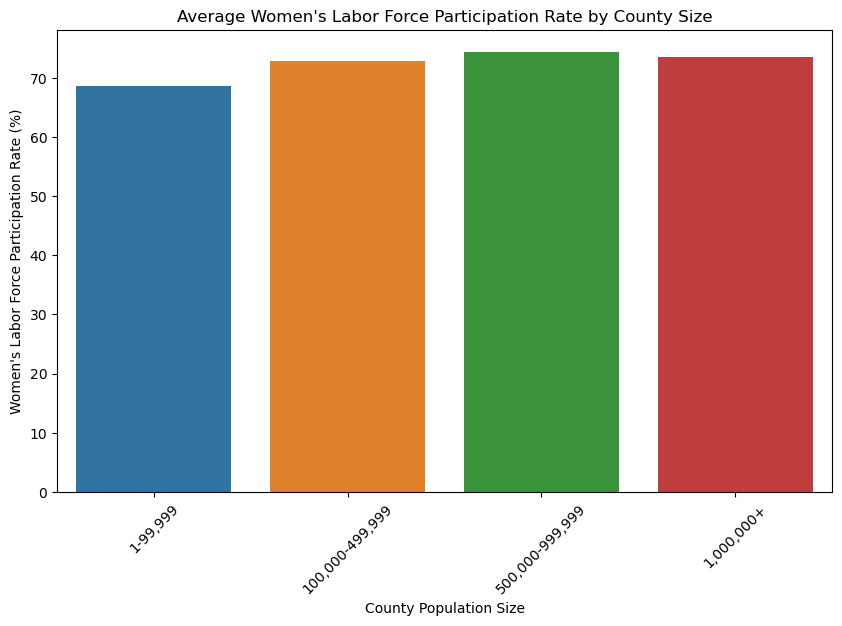

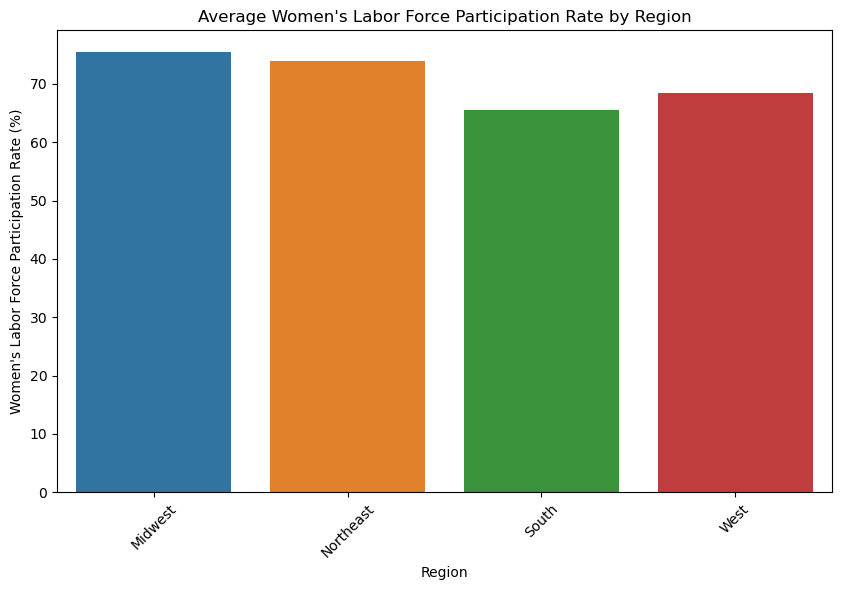

In [30]:
# Plot the results for county size
plt.figure(figsize=(10, 6))
sns.barplot(x='County Population Size', y="Women's labor force participation rate (%)", data=average_participation_by_county_size_df)
plt.title("Average Women's Labor Force Participation Rate by County Size")
plt.ylabel("Women's Labor Force Participation Rate (%)")
plt.xlabel("County Population Size")
plt.xticks(rotation=45)
plt.show()

# Plot the results for region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y="Women's labor force participation rate (%)", data=average_participation_by_region_df)
plt.title("Average Women's Labor Force Participation Rate by Region")
plt.ylabel("Women's Labor Force Participation Rate (%)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

Average Women's Labor Force Participation Rate by Race:
                                    Percent Asian (%)  Percent Black (%)  \
Percent Asian (%)                           42.500000           2.400000   
Percent Black (%)                            0.934483          59.993966   
Percent Hispanic (of any race) (%)           1.200000           3.650000   
Percent White (%)                            1.345948           7.717640   

                                    Percent Hispanic (of any race) (%)  \
Percent Asian (%)                                             9.800000   
Percent Black (%)                                             3.368966   
Percent Hispanic (of any race) (%)                           79.100000   
Percent White (%)                                             8.750471   

                                    Percent White (%)  \
Percent Asian (%)                           21.000000   
Percent Black (%)                           35.836207   
Percent Hispanic (of 

<Figure size 1400x800 with 0 Axes>

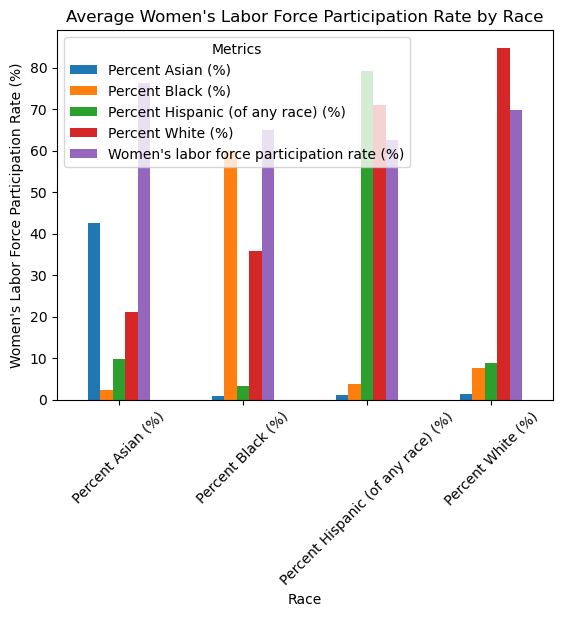

                                        OLS Regression Results                                        
Dep. Variable:     Women's labor force participation rate (%)   R-squared:                       0.125
Model:                                                    OLS   Adj. R-squared:                  0.124
Method:                                         Least Squares   F-statistic:                     99.84
Date:                                        Thu, 20 Jun 2024   Prob (F-statistic):           1.62e-79
Time:                                                02:39:29   Log-Likelihood:                -9523.6
No. Observations:                                        2790   AIC:                         1.906e+04
Df Residuals:                                            2785   BIC:                         1.909e+04
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust            

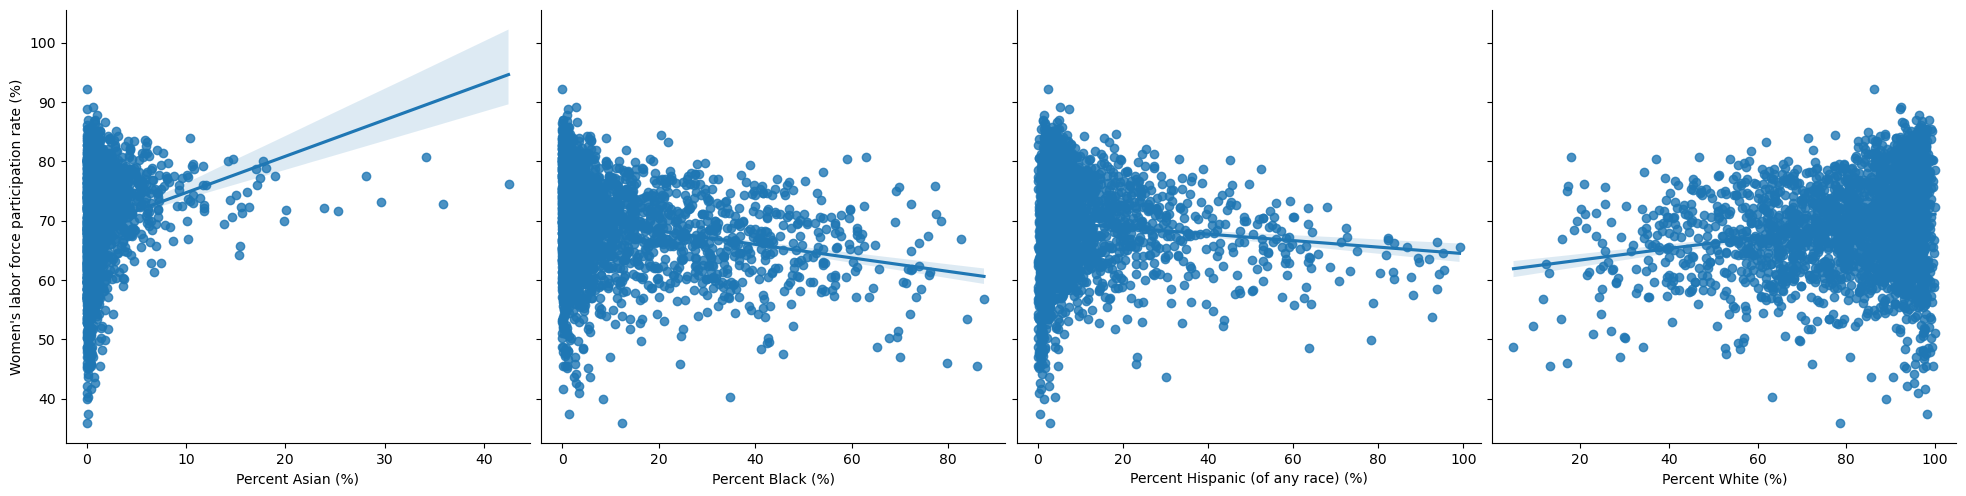

In [31]:
# Calculate the women's labor force participation rate by race
races = ['Percent Asian (%)', 'Percent Black (%)', 'Percent Hispanic (of any race) (%)', 'Percent White (%)']
average_participation_by_race = data[races + ["Women's labor force participation rate (%)"]].groupby(data[races].idxmax(axis=1)).mean()

# Print the average women's labor force participation rate by race
print("Average Women's Labor Force Participation Rate by Race:")
print(average_participation_by_race)

# Plot the results
plt.figure(figsize=(14, 8))
average_participation_by_race.plot(kind='bar')
plt.title("Average Women's Labor Force Participation Rate by Race")
plt.ylabel("Women's Labor Force Participation Rate (%)")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

# Perform Regression Analysis
# Define the independent variables (racial demographics)
X = data[races]
# Define the dependent variable (women's labor force participation rate)
y = data["Women's labor force participation rate (%)"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Plotting the regression results
sns.pairplot(data, x_vars=races, y_vars="Women's labor force participation rate (%)", kind='reg', height=5)
plt.show()

                                        OLS Regression Results                                        
Dep. Variable:     Women's labor force participation rate (%)   R-squared:                       0.460
Model:                                                    OLS   Adj. R-squared:                  0.459
Method:                                         Least Squares   F-statistic:                     395.6
Date:                                        Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                                                02:45:07   Log-Likelihood:                -8850.2
No. Observations:                                        2790   AIC:                         1.771e+04
Df Residuals:                                            2783   BIC:                         1.776e+04
Df Model:                                                   6                                         
Covariance Type:                                    nonrobust            

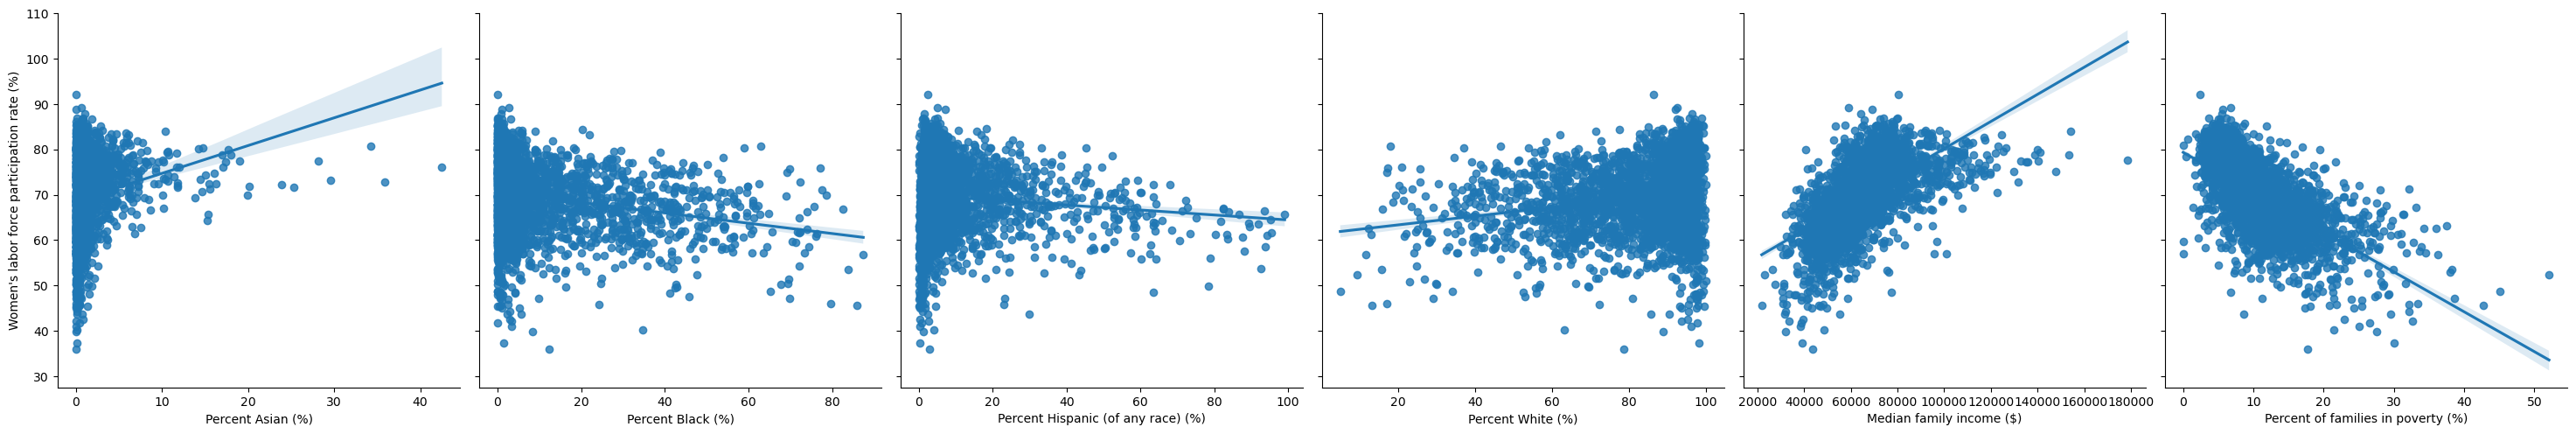

In [32]:
# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Perform Regression Analysis with additional variables
additional_vars = ['Median family income ($)', 'Percent of families in poverty (%)']
X = data[['Percent Asian (%)', 'Percent Black (%)', 'Percent Hispanic (of any race) (%)', 'Percent White (%)'] + additional_vars]
y = data["Women's labor force participation rate (%)"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Visualize the results with additional variables
sns.pairplot(data, x_vars=X.columns[1:], y_vars="Women's labor force participation rate (%)", kind='reg', height=5)
plt.show()

HYPOTHESIS 1 - 

In [38]:
# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Create dummy variables for the county population size
population_size_dummies = pd.get_dummies(data['County Population Size'], drop_first=True)

# Combine the dummy variables with the main dataset
data = pd.concat([data, population_size_dummies], axis=1)

# Define the socioeconomic factors
socioeconomic_factors = [
    'Median family income ($)', 
    'Percent of families in poverty (%)', 
    "Women's labor force participation rate (%)"
] + list(population_size_dummies.columns)

# Define the childcare costs columns
childcare_costs = [
    'Infant center-based price: 2018 ($)',
    'Infant home-based price: 2018 ($)',
    'Toddler center-based price: 2018 ($)',
    'Toddler home-based price: 2018 ($)',
    'Preschool center-based price: 2018 ($)',
    'Preschool home-based price: 2018 ($)',
    'School-age center-based price: 2018 ($)',
    'School-age home-based price: 2018 ($)'
]

# Run regression for each type of childcare cost
results = {}
for cost in childcare_costs:
    X = data[socioeconomic_factors]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results[cost] = model.summary()

# Print the results
for cost, result in results.items():
    print(f"Regression Results for {cost}:\n")
    print(result)
    print("\n\n")

Regression Results for Infant center-based price: 2018 ($):

                                     OLS Regression Results                                    
Dep. Variable:     Infant center-based price: 2018 ($)   R-squared:                       0.555
Model:                                             OLS   Adj. R-squared:                  0.554
Method:                                  Least Squares   F-statistic:                     577.8
Date:                                 Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                                         03:06:22   Log-Likelihood:                -25020.
No. Observations:                                 2790   AIC:                         5.005e+04
Df Residuals:                                     2783   BIC:                         5.009e+04
Df Model:                                            6                                         
Covariance Type:                             nonrobust                     

In [39]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = 'C:/Users/ask4d/OneDrive/Desktop/Baypath University/Summer 2024/Dataset/Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Create dummy variables for the county population size and region
population_size_dummies = pd.get_dummies(data['County Population Size'], drop_first=True)
region_dummies = pd.get_dummies(data['Region'], drop_first=True)

# Combine the dummy variables with the main dataset
data = pd.concat([data, population_size_dummies, region_dummies], axis=1)

# Define the socioeconomic factors
socioeconomic_factors = [
    'Median family income ($)', 
    'Percent of families in poverty (%)', 
    "Women's labor force participation rate (%)",
    "Women's median earnings ($)",
    'Percent Asian (%)', 
    'Percent Black (%)', 
    'Percent Hispanic (of any race) (%)', 
    'Percent White (%)'
] + list(population_size_dummies.columns) + list(region_dummies.columns)

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Run regression for each type of childcare cost percentage of income
results = {}
for cost in childcare_costs_percent_income:
    X = data[socioeconomic_factors]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results[cost] = model.summary()

# Print the results
for cost, result in results.items():
    print(f"Regression Results for {cost}:\n")
    print(result)
    print("\n\n")


Regression Results for Infant center-based price as share of family income: 2018 (%):

                                                  OLS Regression Results                                                 
Dep. Variable:     Infant center-based price as share of family income: 2018 (%)   R-squared:                       0.319
Model:                                                                       OLS   Adj. R-squared:                  0.316
Method:                                                            Least Squares   F-statistic:                     92.83
Date:                                                           Thu, 20 Jun 2024   Prob (F-statistic):          3.62e-219
Time:                                                                   03:09:14   Log-Likelihood:                -6644.9
No. Observations:                                                           2790   AIC:                         1.332e+04
Df Residuals:                                              

In [40]:
# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Create dummy variables for the county population size and region
population_size_dummies = pd.get_dummies(data['County Population Size'], drop_first=True)
region_dummies = pd.get_dummies(data['Region'], drop_first=True)

# Combine the dummy variables with the main dataset
data = pd.concat([data, population_size_dummies, region_dummies], axis=1)

# Define the best socioeconomic factors
best_socioeconomic_factors = [
    'Median family income ($)', 
    'Percent of families in poverty (%)', 
    "Women's labor force participation rate (%)",
    "Women's median earnings ($)",
    'Percent Asian (%)', 
    'Percent Hispanic (of any race) (%)'
] + list(population_size_dummies.columns) + list(region_dummies.columns)

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Run regression for each type of childcare cost percentage of income
results = {}
for cost in childcare_costs_percent_income:
    X = data[best_socioeconomic_factors]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results[cost] = model.summary()

# Print the results
for cost, result in results.items():
    print(f"Regression Results for {cost}:\n")
    print(result)
    print("\n\n")

Regression Results for Infant center-based price as share of family income: 2018 (%):

                                                  OLS Regression Results                                                 
Dep. Variable:     Infant center-based price as share of family income: 2018 (%)   R-squared:                       0.316
Model:                                                                       OLS   Adj. R-squared:                  0.313
Method:                                                            Least Squares   F-statistic:                     106.8
Date:                                                           Thu, 20 Jun 2024   Prob (F-statistic):          2.50e-218
Time:                                                                   03:14:51   Log-Likelihood:                -6651.6
No. Observations:                                                           2790   AIC:                         1.333e+04
Df Residuals:                                              

In [41]:
# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Create dummy variables for the county population size and region
population_size_dummies = pd.get_dummies(data['County Population Size'], drop_first=True)
region_dummies = pd.get_dummies(data['Region'], drop_first=True)

# Combine the dummy variables with the main dataset (ensure no duplication)
data = data.drop(columns=['County Population Size', 'Region'])  # Drop the original categorical columns
data = pd.concat([data, population_size_dummies, region_dummies], axis=1)

# Define the best socioeconomic factors
best_socioeconomic_factors = [
    'Median family income ($)', 
    'Percent of families in poverty (%)', 
    "Women's labor force participation rate (%)",
    "Women's median earnings ($)",
    'Percent Asian (%)', 
    'Percent Hispanic (of any race) (%)'
] + list(population_size_dummies.columns) + list(region_dummies.columns)

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Run regression for each type of childcare cost percentage of income
results = {}
for cost in childcare_costs_percent_income:
    X = data[best_socioeconomic_factors]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results[cost] = model.summary()

# Print the results
for cost, result in results.items():
    print(f"Regression Results for {cost}:\n")
    print(result)
    print("\n\n")

Regression Results for Infant center-based price as share of family income: 2018 (%):

                                                  OLS Regression Results                                                 
Dep. Variable:     Infant center-based price as share of family income: 2018 (%)   R-squared:                       0.316
Model:                                                                       OLS   Adj. R-squared:                  0.313
Method:                                                            Least Squares   F-statistic:                     106.8
Date:                                                           Thu, 20 Jun 2024   Prob (F-statistic):          2.50e-218
Time:                                                                   03:16:36   Log-Likelihood:                -6651.6
No. Observations:                                                           2790   AIC:                         1.333e+04
Df Residuals:                                              

In [42]:
# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Create dummy variables for the county population size and region
population_size_dummies = pd.get_dummies(data['County Population Size'], prefix='CountySize', drop_first=True)
region_dummies = pd.get_dummies(data['Region'], prefix='Region', drop_first=True)

# Combine the dummy variables with the main dataset
data = pd.concat([data, population_size_dummies, region_dummies], axis=1)

# Define the socioeconomic factors
socioeconomic_factors = [
    'Median family income ($)', 
    'Percent of families in poverty (%)', 
    "Women's labor force participation rate (%)",
    "Women's median earnings ($)",
    'Percent Asian (%)', 
    'Percent Hispanic (of any race) (%)'
] + list(population_size_dummies.columns) + list(region_dummies.columns)

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Function to run regression for a given factor and childcare cost
def run_regression(factor, cost):
    X = data[[factor]]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

# Run regression for each socioeconomic factor and each type of childcare cost percentage of income
results = {}
for cost in childcare_costs_percent_income:
    factor_results = {}
    for factor in socioeconomic_factors:
        factor_results[factor] = run_regression(factor, cost)
    results[cost] = factor_results

# Print the results
for cost, factor_results in results.items():
    print(f"Regression Results for {cost}:\n")
    for factor, result in factor_results.items():
        print(f"Factor: {factor}\n")
        print(result)
        print("\n")
    print("\n\n")

KeyError: 'Region'

HYOTHESIS 1 MAIN ANALYSIS

In [43]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = 'C:/Users/ask4d/OneDrive/Desktop/Baypath University/Summer 2024/Dataset/Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

# Print column names to verify
print("Column Names in the Dataset:\n")
print(data.columns)

# Define the county population size categories
population_bins = [0, 99999, 499999, 999999, float('inf')]
population_labels = ['1-99,999', '100,000-499,999', '500,000-999,999', '1,000,000+']

# Bin the counties based on population size
data['County Population Size'] = pd.cut(data['Total population'], bins=population_bins, labels=population_labels)

# Create dummy variables for the county population size
population_size_dummies = pd.get_dummies(data['County Population Size'], prefix='CountySize', drop_first=True)

# Check if 'Region' column exists and create dummy variables
if 'Region' in data.columns:
    region_dummies = pd.get_dummies(data['Region'], prefix='Region', drop_first=True)
    data = pd.concat([data, region_dummies], axis=1)
else:
    print("Column 'Region' not found in the dataset.")

# Combine the dummy variables with the main dataset
data = pd.concat([data, population_size_dummies], axis=1)

# Define the socioeconomic factors
socioeconomic_factors = [
    'Median family income ($)', 
    'Percent of families in poverty (%)', 
    "Women's labor force participation rate (%)",
    "Women's median earnings ($)",
    'Percent Asian (%)', 
    'Percent Hispanic (of any race) (%)'
] + list(population_size_dummies.columns)

# Add region dummies if they were created
if 'Region' in data.columns:
    socioeconomic_factors += list(region_dummies.columns)

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Function to run regression for a given factor and childcare cost
def run_regression(factor, cost):
    X = data[[factor]]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

# Run regression for each socioeconomic factor and each type of childcare cost percentage of income
results = {}
for cost in childcare_costs_percent_income:
    factor_results = {}
    for factor in socioeconomic_factors:
        factor_results[factor] = run_regression(factor, cost)
    results[cost] = factor_results

# Print the results
for cost, factor_results in results.items():
    print(f"Regression Results for {cost}:\n")
    for factor, result in factor_results.items():
        print(f"Factor: {factor}\n")
        print(result)
        print("\n")
    print("\n\n")


Column Names in the Dataset:

Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant center-based price as share of family income: 2018 (%)',
       'Infant home-based price: 2018 ($)',
       'Infant home-based price as share of family income: 2018 (%)',
       'Toddler center-based price: 2018 ($)',
       'Toddler center-based price as share of family income: 2018 (%)',
       'Toddler home-based price: 2018 ($)',
       'Toddler home-based price as share of family income: 2018 (%)',
       'Preschool center-based price: 2018 ($)',
       'Preschool center-based price as share of family income: 2018 (%)',
       'Preschool home-based price: 2018 ($)',
       'Preschool home-based price as share of family income: 2018 (%)',
       'School-age center-based price: 2018 ($)',
       'School-age center-based price as share of family income: 2018 (%)',
       'School-age home-based price: 2018 ($)',
   

MEDIAN FAMILY INCOME

In [44]:
# Define the median family income as the only socioeconomic factor
socioeconomic_factors = ['Median family income ($)']

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Function to run regression for a given factor and childcare cost
def run_regression(factor, cost):
    X = data[[factor]]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

# Run regression for median family income and each type of childcare cost percentage of income
results = {}
for cost in childcare_costs_percent_income:
    results[cost] = run_regression('Median family income ($)', cost)

# Print the results
for cost, result in results.items():
    print(f"Regression Results for {cost}:\n")
    print(result)
    print("\n")

Regression Results for Infant center-based price as share of family income: 2018 (%):

                                                  OLS Regression Results                                                 
Dep. Variable:     Infant center-based price as share of family income: 2018 (%)   R-squared:                       0.008
Model:                                                                       OLS   Adj. R-squared:                  0.008
Method:                                                            Least Squares   F-statistic:                     22.38
Date:                                                           Thu, 20 Jun 2024   Prob (F-statistic):           2.34e-06
Time:                                                                   04:32:45   Log-Likelihood:                -7169.6
No. Observations:                                                           2790   AIC:                         1.434e+04
Df Residuals:                                              

REGION - MIDWEST AS REFRENCE REGION

In [45]:
# Define the socioeconomic factors including region dummies
socioeconomic_factors = list(region_dummies.columns)

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Function to run regression for given factors and childcare cost
def run_regression(factors, cost):
    X = data[factors]
    y = data[cost]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

# Run regression for each type of childcare cost percentage of income including region
results = {}
for cost in childcare_costs_percent_income:
    results[cost] = run_regression(socioeconomic_factors, cost)

# Print the results
for cost, result in results.items():
    print(f"Regression Results for {cost}:\n")
    print(result)
    print("\n")

Regression Results for Infant center-based price as share of family income: 2018 (%):

                                                  OLS Regression Results                                                 
Dep. Variable:     Infant center-based price as share of family income: 2018 (%)   R-squared:                       0.103
Model:                                                                       OLS   Adj. R-squared:                  0.102
Method:                                                            Least Squares   F-statistic:                     106.2
Date:                                                           Thu, 20 Jun 2024   Prob (F-statistic):           4.50e-65
Time:                                                                   04:45:42   Log-Likelihood:                -7029.7
No. Observations:                                                           2790   AIC:                         1.407e+04
Df Residuals:                                              

REGION - NORTHEAST AS REFRENCE REGION

In [56]:
# Load the dataset
file_path =  r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

In [58]:
# Ensure 'Region' column is present
if 'Region' in data.columns:
    region_dummies = pd.get_dummies(data['Region'], drop_first=True)  # drop_first=True to automatically set the reference category
    data = pd.concat([data, region_dummies], axis=1)
else:
    print("Column 'Region' not found in the dataset.")

In [59]:
# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Store results
results = {}

# Perform regression for each dependent variable using 'Region' as an independent variable
for dep_var in childcare_costs_percent_income:
    formula = f"Q('{dep_var}') ~ C(Region, Treatment(reference='Northeast'))"
    y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(y, X).fit()
    results[dep_var] = model

# Display the results including R-squared values
for dep_var, result in results.items():
    print(f"Results for {dep_var}:\n")
    print(result.summary())
    print(f"R-squared: {result.rsquared}")
    print("\n\n")

Results for Infant center-based price as share of family income: 2018 (%):

                                                    OLS Regression Results                                                    
Dep. Variable:     Q('Infant center-based price as share of family income: 2018 (%)')   R-squared:                       0.103
Model:                                                                            OLS   Adj. R-squared:                  0.102
Method:                                                                 Least Squares   F-statistic:                     106.2
Date:                                                                Thu, 20 Jun 2024   Prob (F-statistic):           4.50e-65
Time:                                                                        13:36:52   Log-Likelihood:                -7029.7
No. Observations:                                                                2790   AIC:                         1.407e+04
Df Residuals:                      

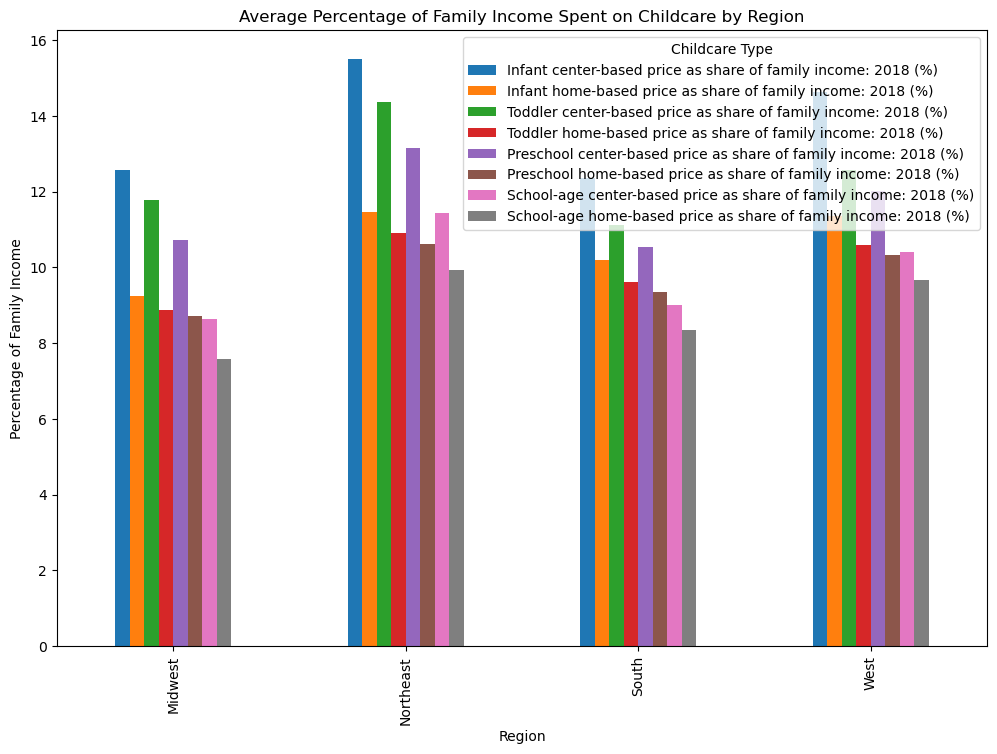

In [60]:
import matplotlib.pyplot as plt

# Calculate average percentages
average_costs = data.groupby('Region')[childcare_costs_percent_income].mean()

# Plot bar charts
average_costs.plot(kind='bar', figsize=(12, 8))
plt.title('Average Percentage of Family Income Spent on Childcare by Region')
plt.ylabel('Percentage of Family Income')
plt.xlabel('Region')
plt.legend(title='Childcare Type')
plt.show()


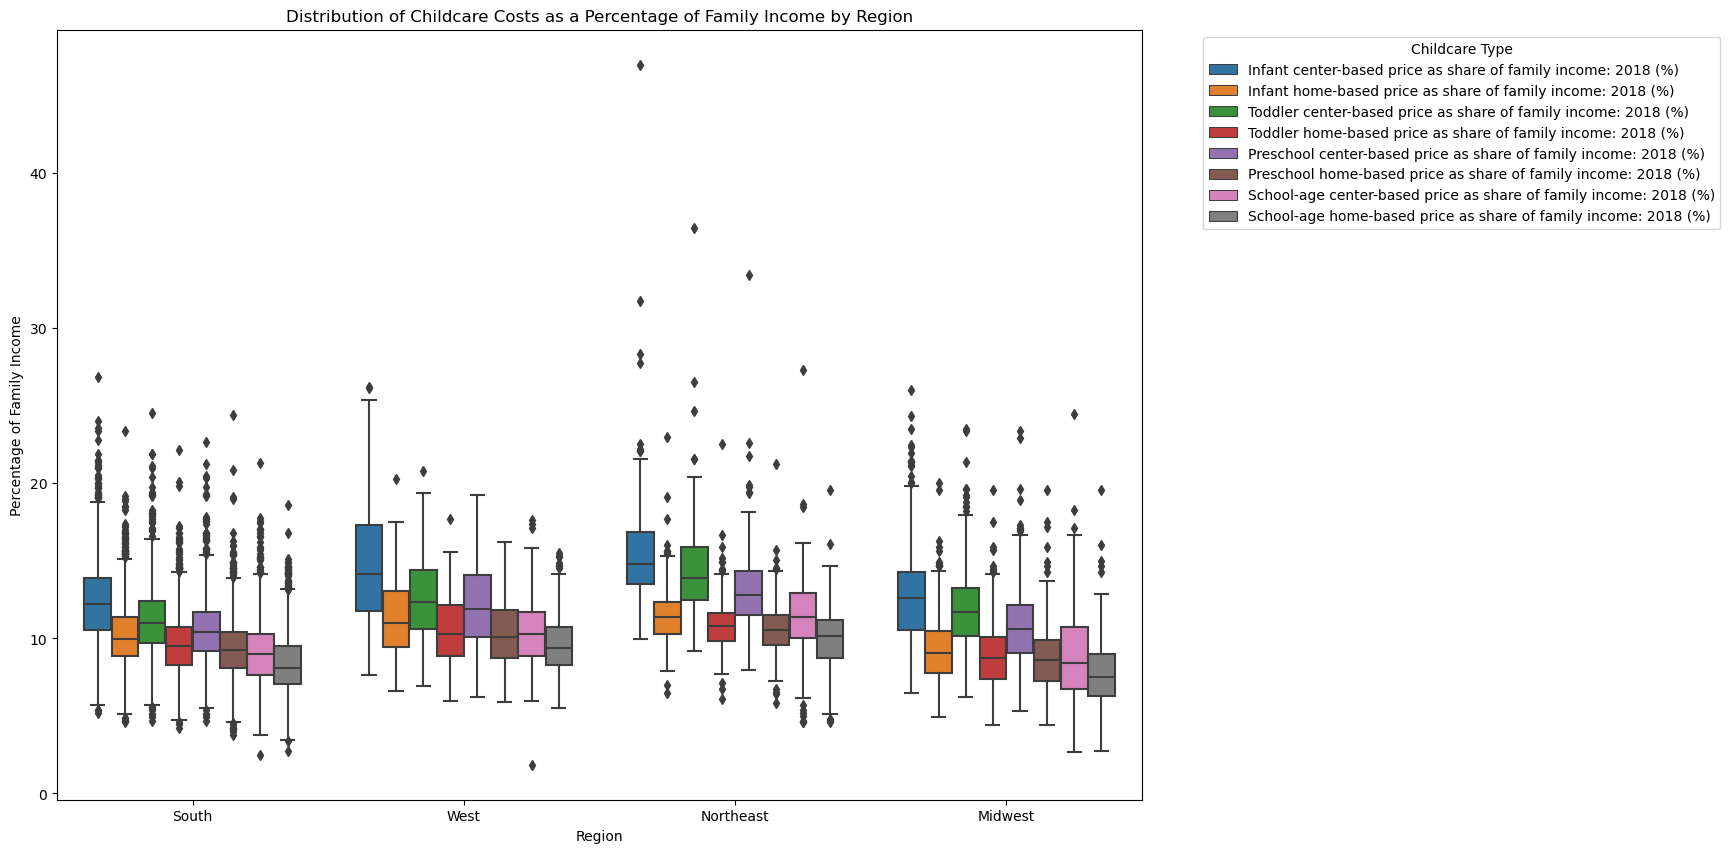

In [61]:
import seaborn as sns

# Melt the dataframe for seaborn boxplot
melted_data = data.melt(id_vars=['Region'], value_vars=childcare_costs_percent_income, 
                        var_name='Childcare Type', value_name='Percentage of Income')

# Plot box plots
plt.figure(figsize=(14, 10))
sns.boxplot(data=melted_data, x='Region', y='Percentage of Income', hue='Childcare Type')
plt.title('Distribution of Childcare Costs as a Percentage of Family Income by Region')
plt.ylabel('Percentage of Family Income')
plt.xlabel('Region')
plt.legend(title='Childcare Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


    COUNTY SIZE - SMALL COUNTY AS REFRENCE 
    

In [63]:
# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Store results
results = {}

# Perform regression for each dependent variable using 'County Size' as an independent variable
for dep_var in childcare_costs_percent_income:
    formula = f"Q('{dep_var}') ~ Q('County Size')"
    y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(y, X).fit()
    results[dep_var] = model

# Display the results including R-squared values
for dep_var, result in results.items():
    print(f"Results for {dep_var}:\n")
    print(result.summary())
    print(f"R-squared: {result.rsquared}")
    print("\n\n")

Results for Infant center-based price as share of family income: 2018 (%):

                                                    OLS Regression Results                                                    
Dep. Variable:     Q('Infant center-based price as share of family income: 2018 (%)')   R-squared:                       0.089
Model:                                                                            OLS   Adj. R-squared:                  0.088
Method:                                                                 Least Squares   F-statistic:                     90.39
Date:                                                                Thu, 20 Jun 2024   Prob (F-statistic):           8.05e-56
Time:                                                                        14:09:00   Log-Likelihood:                -7051.1
No. Observations:                                                                2790   AIC:                         1.411e+04
Df Residuals:                      

COUNTY SIZE - MIDSIZE COUNTY AS REFRENCE 

In [64]:
# Check if 'County Size' column exists and create dummy variables, with Mid-sized county as the reference category
if 'County Size' in data.columns:
    county_dummies = pd.get_dummies(data['County Size'], drop_first=False)  # Keep all dummies
    county_dummies.drop('Mid-sized county', axis=1, inplace=True)  # Drop the Mid-sized county column to make it the reference category
    data = pd.concat([data, county_dummies], axis=1)
else:
    print("Column 'County Size' not found in the dataset.")

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Store results
results = {}

# Perform regression for each dependent variable using 'County Size' as an independent variable
for dep_var in childcare_costs_percent_income:
    formula = f"Q('{dep_var}') ~ C(Q('County Size'), Treatment(reference='Mid-sized county'))"
    y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(y, X).fit()
    results[dep_var] = model

# Display the results including R-squared values
for dep_var, result in results.items():
    print(f"Results for {dep_var}:\n")
    print(result.summary())
    print(f"R-squared: {result.rsquared}")
    print("\n\n")

Results for Infant center-based price as share of family income: 2018 (%):

                                                    OLS Regression Results                                                    
Dep. Variable:     Q('Infant center-based price as share of family income: 2018 (%)')   R-squared:                       0.089
Model:                                                                            OLS   Adj. R-squared:                  0.088
Method:                                                                 Least Squares   F-statistic:                     90.39
Date:                                                                Thu, 20 Jun 2024   Prob (F-statistic):           8.05e-56
Time:                                                                        15:03:20   Log-Likelihood:                -7051.1
No. Observations:                                                                2790   AIC:                         1.411e+04
Df Residuals:                      

In [ ]:
COUNTY SIZE - LARGE COUNTY AS REFRENCE 

In [65]:
# Check if 'County Size' column exists and create dummy variables, with Large county as the reference category
if 'County Size' in data.columns:
    county_dummies = pd.get_dummies(data['County Size'], drop_first=False)  # Keep all dummies
    county_dummies.drop('Large county', axis=1, inplace=True)  # Drop the Large county column to make it the reference category
    data = pd.concat([data, county_dummies], axis=1)
else:
    print("Column 'County Size' not found in the dataset.")

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Store results
results = {}

# Perform regression for each dependent variable using 'County Size' as an independent variable
for dep_var in childcare_costs_percent_income:
    formula = f"Q('{dep_var}') ~ C(Q('County Size'), Treatment(reference='Large county'))"
    y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(y, X).fit()
    results[dep_var] = model

# Display the results including R-squared values
for dep_var, result in results.items():
    print(f"Results for {dep_var}:\n")
    print(result.summary())
    print(f"R-squared: {result.rsquared}")
    print("\n\n")

Results for Infant center-based price as share of family income: 2018 (%):

                                                    OLS Regression Results                                                    
Dep. Variable:     Q('Infant center-based price as share of family income: 2018 (%)')   R-squared:                       0.089
Model:                                                                            OLS   Adj. R-squared:                  0.088
Method:                                                                 Least Squares   F-statistic:                     90.39
Date:                                                                Thu, 20 Jun 2024   Prob (F-statistic):           8.05e-56
Time:                                                                        15:05:14   Log-Likelihood:                -7051.1
No. Observations:                                                                2790   AIC:                         1.411e+04
Df Residuals:                      

COUNTY SIZE - VERY LARGE COUNTY AS REFRENCE 

In [66]:
# Check if 'County Size' column exists and create dummy variables, with Very large county as the reference category
if 'County Size' in data.columns:
    county_dummies = pd.get_dummies(data['County Size'], drop_first=False)  # Keep all dummies
    county_dummies.drop('Very large county', axis=1, inplace=True)  # Drop the Very large county column to make it the reference category
    data = pd.concat([data, county_dummies], axis=1)
else:
    print("Column 'County Size' not found in the dataset.")

# Define the percentage of family income spent on childcare columns
childcare_costs_percent_income = [
    'Infant center-based price as share of family income: 2018 (%)',
    'Infant home-based price as share of family income: 2018 (%)',
    'Toddler center-based price as share of family income: 2018 (%)',
    'Toddler home-based price as share of family income: 2018 (%)',
    'Preschool center-based price as share of family income: 2018 (%)',
    'Preschool home-based price as share of family income: 2018 (%)',
    'School-age center-based price as share of family income: 2018 (%)',
    'School-age home-based price as share of family income: 2018 (%)'
]

# Store results
results = {}

# Perform regression for each dependent variable using 'County Size' as an independent variable
for dep_var in childcare_costs_percent_income:
    formula = f"Q('{dep_var}') ~ C(Q('County Size'), Treatment(reference='Very large county'))"
    y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(y, X).fit()
    results[dep_var] = model

# Display the results including R-squared values
for dep_var, result in results.items():
    print(f"Results for {dep_var}:\n")
    print(result.summary())
    print(f"R-squared: {result.rsquared}")
    print("\n\n")

Results for Infant center-based price as share of family income: 2018 (%):

                                                    OLS Regression Results                                                    
Dep. Variable:     Q('Infant center-based price as share of family income: 2018 (%)')   R-squared:                       0.089
Model:                                                                            OLS   Adj. R-squared:                  0.088
Method:                                                                 Least Squares   F-statistic:                     90.39
Date:                                                                Thu, 20 Jun 2024   Prob (F-statistic):           8.05e-56
Time:                                                                        15:08:19   Log-Likelihood:                -7051.1
No. Observations:                                                                2790   AIC:                         1.411e+04
Df Residuals:                      

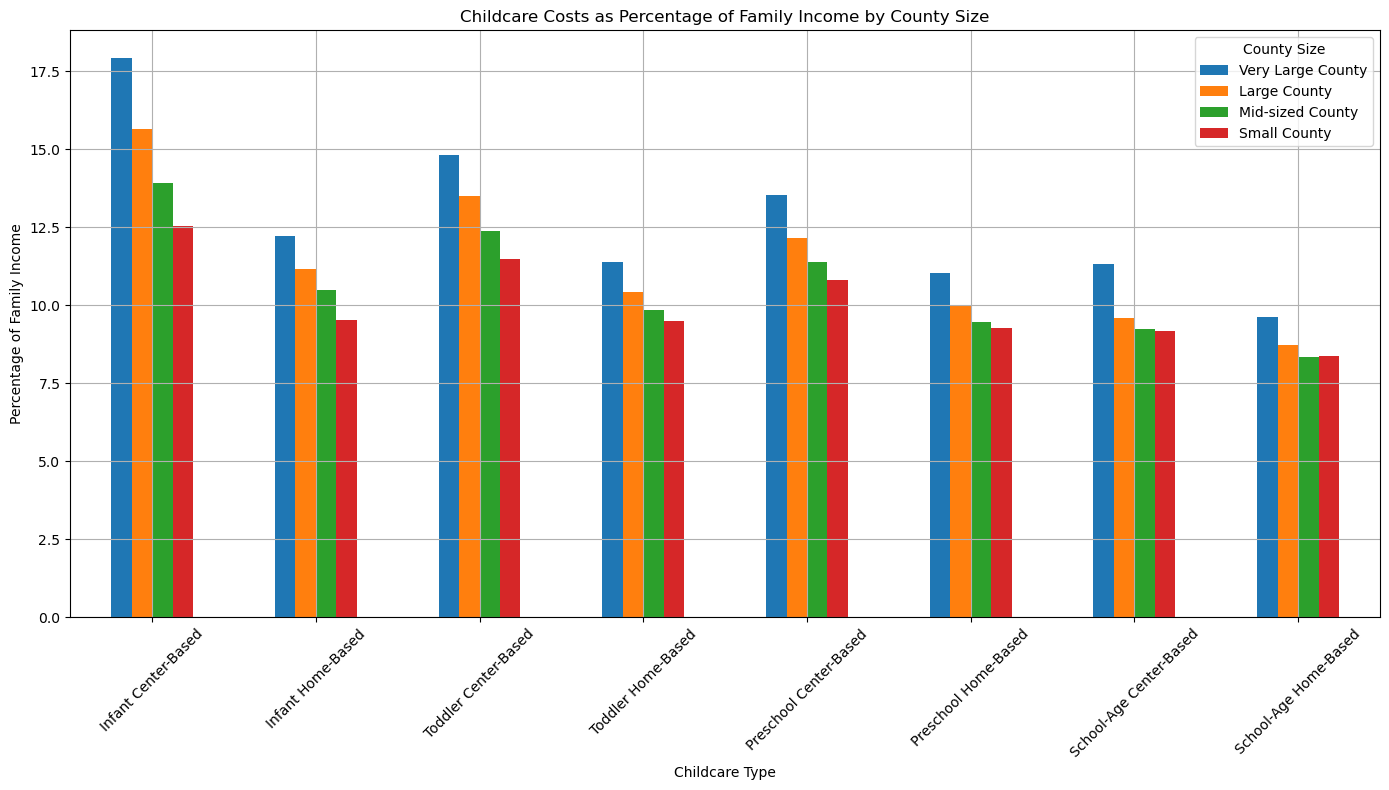

In [69]:
import pandas as pd

# Data from the regression analysis
data_summary = {
    'Childcare Type': [
        'Infant Center-Based', 'Infant Home-Based', 'Toddler Center-Based', 
        'Toddler Home-Based', 'Preschool Center-Based', 'Preschool Home-Based',
        'School-Age Center-Based', 'School-Age Home-Based'
    ],
    'Very Large County': [
        17.9145, 12.2126, 14.8105, 11.3834, 13.5215, 11.0188, 11.3053, 9.6203
    ],
    'Large County': [
        15.6603, 11.1504, 13.4917, 10.4135, 12.1575, 10.0057, 9.6047, 8.7101
    ],
    'Mid-sized County': [
        13.9091, 10.4761, 12.3701, 9.8567, 11.3776, 9.4738, 9.2310, 8.3340
    ],
    'Small County': [
        12.5306, 9.5243, 11.4927, 9.4958, 10.7918, 9.2792, 9.1806, 8.3555
    ]
}



import matplotlib.pyplot as plt

# Plotting
df.set_index('Childcare Type').plot(kind='bar', figsize=(14, 8))

plt.title('Childcare Costs as Percentage of Family Income by County Size')
plt.xlabel('Childcare Type')
plt.ylabel('Percentage of Family Income')
plt.xticks(rotation=45)
plt.legend(title='County Size')
plt.grid(True)
plt.tight_layout()




RACE

Results for Infant_Center_Share:

                             OLS Regression Results                            
Dep. Variable:     Infant_Center_Share   R-squared:                       0.097
Model:                             OLS   Adj. R-squared:                  0.096
Method:                  Least Squares   F-statistic:                     74.80
Date:                 Thu, 20 Jun 2024   Prob (F-statistic):           2.63e-60
Time:                         16:17:00   Log-Likelihood:                -7038.4
No. Observations:                 2790   AIC:                         1.409e+04
Df Residuals:                     2785   BIC:                         1.412e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

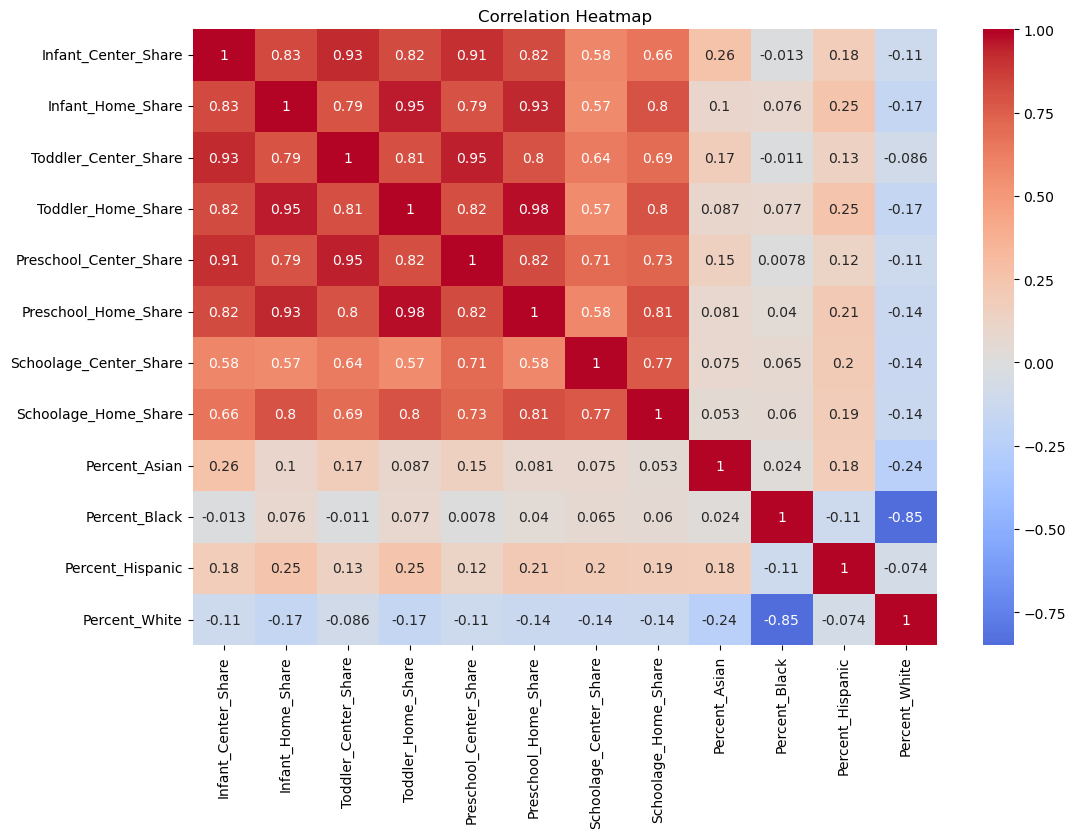

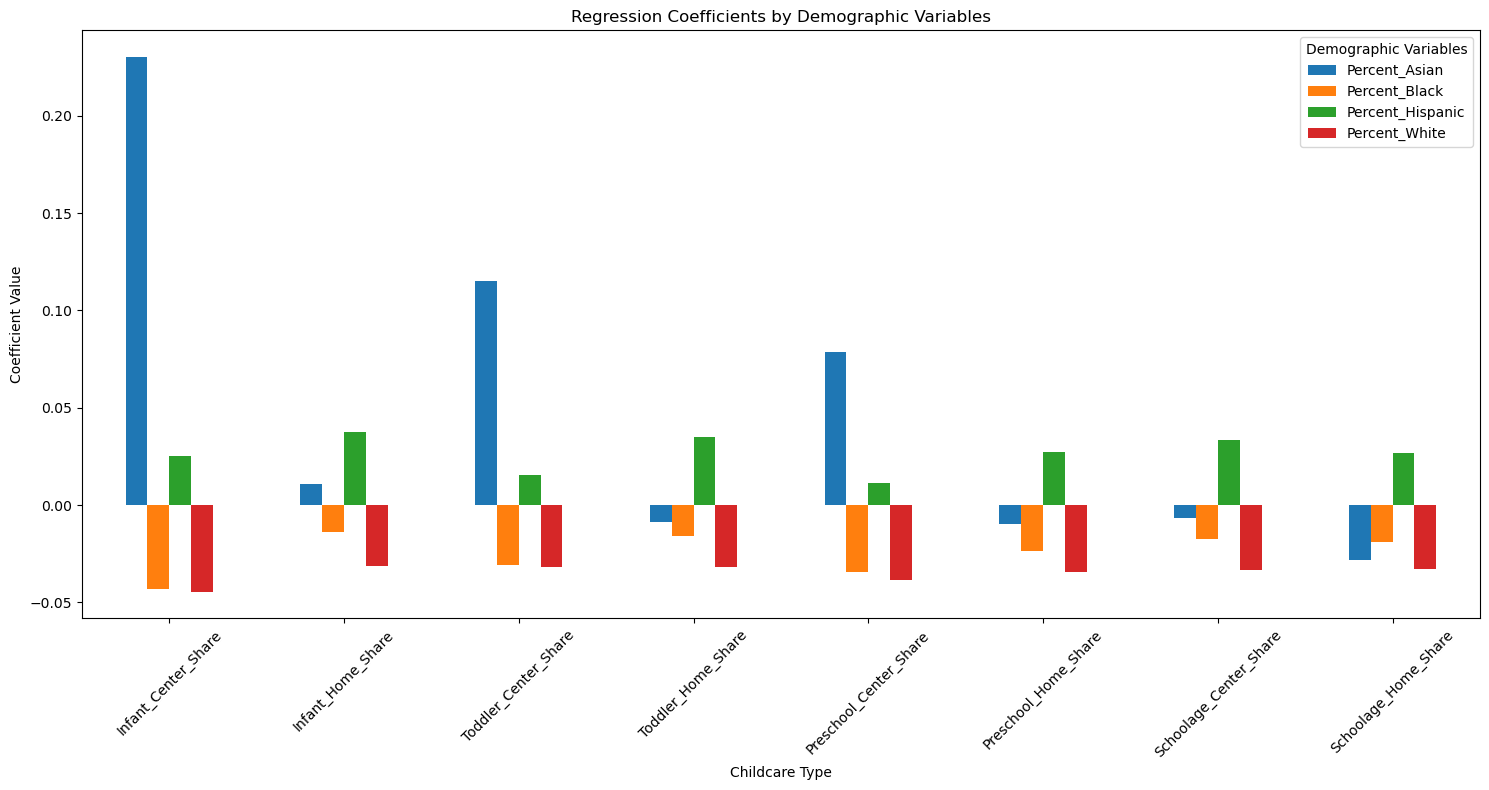

In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices

# Rename columns for simplicity
data = data.rename(columns={
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_Center_Share',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_Home_Share',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_Center_Share',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_Home_Share',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_Center_Share',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_Home_Share',
    'School-age center-based price as share of family income: 2018 (%)': 'Schoolage_Center_Share',
    'School-age home-based price as share of family income: 2018 (%)': 'Schoolage_Home_Share',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White'
})

# Define new names for dependent variables
new_dependent_vars = [
    'Infant_Center_Share',
    'Infant_Home_Share',
    'Toddler_Center_Share',
    'Toddler_Home_Share',
    'Preschool_Center_Share',
    'Preschool_Home_Share',
    'Schoolage_Center_Share',
    'Schoolage_Home_Share'
]

# Define demographic variables to be analyzed
demographic_vars = [
    'Percent_Asian',
    'Percent_Black',
    'Percent_Hispanic',
    'Percent_White'
]

# Store results
results = {}
coefficients = pd.DataFrame()

# Perform regression for each dependent variable using demographic variables
for dep_var in new_dependent_vars:
    formula = f"{dep_var} ~ {' + '.join(demographic_vars)}"
    y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(y, X).fit()
    results[dep_var] = model
    coeffs = model.params
    coeffs.name = dep_var
    coefficients = pd.concat([coefficients, coeffs], axis=1)

# Display the results including R-squared values
for dep_var, result in results.items():
    print(f"Results for {dep_var}:\n")
    print(result.summary())
    print(f"R-squared: {result.rsquared}")
    print("\n\n")

# Create a correlation matrix heatmap
correlation_matrix = data[new_dependent_vars + demographic_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Create a regression map (coefficients visualized)
coefficients = coefficients.drop('Intercept', axis=0)  # Remove the intercept row
coefficients.T.plot(kind='bar', figsize=(15, 8))
plt.title('Regression Coefficients by Demographic Variables')
plt.ylabel('Coefficient Value')
plt.xlabel('Childcare Type')
plt.xticks(rotation=45)
plt.legend(title='Demographic Variables')
plt.tight_layout()
plt.show()




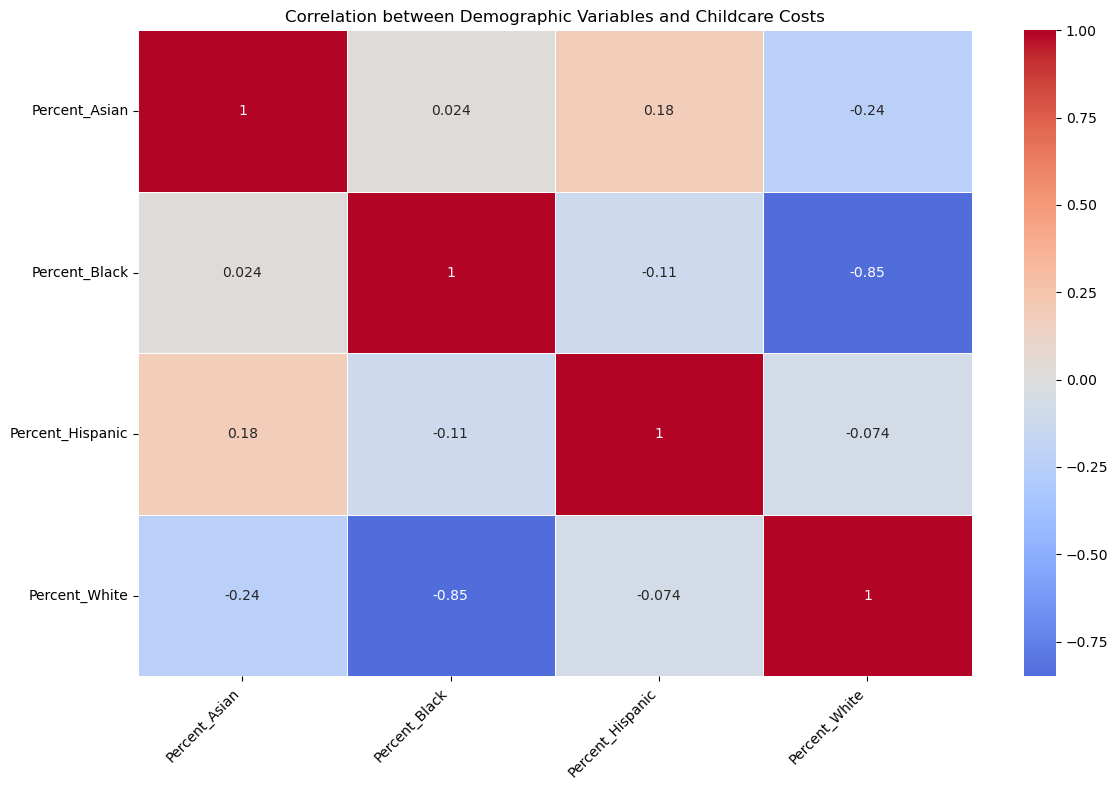

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already loaded into a DataFrame called 'data'

# Rename columns for simplicity
data = data.rename(columns={
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_Center_Share',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_Home_Share',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_Center_Share',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_Home_Share',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_Center_Share',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_Home_Share',
    'School-age center-based price as share of family income: 2018 (%)': 'Schoolage_Center_Share',
    'School-age home-based price as share of family income: 2018 (%)': 'Schoolage_Home_Share',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White'
})

# Select columns for correlation
correlation_cols = [
    
    'Percent_Asian', 'Percent_Black', 'Percent_Hispanic', 'Percent_White'
]

# Calculate the correlation matrix
corr_matrix = data[correlation_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation between Demographic Variables and Childcare Costs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


HYPOTHESIS 2- Regions in the US with higher childcare costs as a percentage of family income tend to have lower women's labor force participation rates. 
We have identified that the Northeast and the West have a higher childcare cost both in absolute price and as a % of income therefore we would expect women’s labor participation rate in those regions to be lower compared to the Midwest and the South. 


In [76]:
print(data.columns)

Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_Center_Share', 'Infant home-based price: 2018 ($)',
       'Infant_Home_Share', 'Toddler center-based price: 2018 ($)',
       'Toddler_Center_Share', 'Toddler home-based price: 2018 ($)',
       'Toddler_Home_Share', 'Preschool center-based price: 2018 ($)',
       'Preschool_Center_Share', 'Preschool home-based price: 2018 ($)',
       'Preschool_Home_Share', 'School-age center-based price: 2018 ($)',
       'Schoolage_Center_Share', 'School-age home-based price: 2018 ($)',
       'Schoolage_Home_Share', 'Women's labor force participation rate (%)',
       'Women's median earnings ($)', 'Median family income ($)',
       'Percent of families in poverty (%)', 'Total population',
       'Percent_Asian', 'Percent_Black', 'Percent_Hispanic', 'Percent_White',
       'Northeast', 'South', 'West', 'Large county', 'Small county',
       'Very large cou

In [78]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

# Assuming 'data' is your DataFrame containing the data
# Rename columns to avoid special characters and spaces
data = data.rename(columns={
    "Women's labor force participation rate (%)": "Womens_labor_force_participation_rate",
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})



In [98]:
# Load the dataset
file_path =  r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

In [99]:

# Print column names to verify
print(data.columns)


Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant center-based price as share of family income: 2018 (%)',
       'Infant home-based price: 2018 ($)',
       'Infant home-based price as share of family income: 2018 (%)',
       'Toddler center-based price: 2018 ($)',
       'Toddler center-based price as share of family income: 2018 (%)',
       'Toddler home-based price: 2018 ($)',
       'Toddler home-based price as share of family income: 2018 (%)',
       'Preschool center-based price: 2018 ($)',
       'Preschool center-based price as share of family income: 2018 (%)',
       'Preschool home-based price: 2018 ($)',
       'Preschool home-based price as share of family income: 2018 (%)',
       'School-age center-based price: 2018 ($)',
       'School-age center-based price as share of family income: 2018 (%)',
       'School-age home-based price: 2018 ($)',
       'School-age home-based pri

In [100]:
# Create dummy variables for regions
data = pd.get_dummies(data, columns=['Region'], drop_first=False)


In [101]:
data = data.rename(columns={
    "Women's labor force participation rate (%)": "Womens_labor_force_participation_rate",
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# List of childcare cost columns to analyze
childcare_cost_columns = [
    'Infant_center_based_cost_pct',
    'Infant_home_based_cost_pct',
    'Toddler_center_based_cost_pct',
    'Toddler_home_based_cost_pct',
    'Preschool_center_based_cost_pct',
    'Preschool_home_based_cost_pct',
    'School_age_center_based_cost_pct',
    'School_age_home_based_cost_pct'
]

# Perform regression analysis for each childcare cost column
for column in childcare_cost_columns:
    # Drop rows with missing values in the relevant columns
    if column not in data.columns:
        print(f"Column {column} not found in data.")
        continue
    data_clean = data.dropna(subset=[column, 'Womens_labor_force_participation_rate'])

    # Define the target variable and predictors
    target = 'Womens_labor_force_participation_rate'
    predictors = [column] + [col for col in data_clean.columns if col.startswith('Region')]

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Use patsy to create design matrices
    y, X = dmatrices(formula, data_clean, return_type='dataframe')

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f'Regression Analysis for {column}')
    print(model.summary())

Regression Analysis for Infant_center_based_cost_pct
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.352
Model:                                               OLS   Adj. R-squared:                  0.351
Method:                                    Least Squares   F-statistic:                     378.1
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):          2.23e-260
Time:                                           17:42:52   Log-Likelihood:                -9105.4
No. Observations:                                   2790   AIC:                         1.822e+04
Df Residuals:                                       2785   BIC:                         1.825e+04
Df Model:                                              4                                         
Covariance Type:                               nonrobust         

NORTHEAST

In [106]:
# Load the dataset
file_path =  r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

In [107]:
# Rename columns to avoid special characters and spaces
data = data.rename(columns={
    "Women's labor force participation rate (%)": "Womens_labor_force_participation_rate",
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Filter data for the Northeast region
data_northeast = data[data['Region'] == 'Northeast']

# List of childcare cost columns to analyze
childcare_cost_columns = [
    'Infant_center_based_cost_pct',
    'Infant_home_based_cost_pct',
    'Toddler_center_based_cost_pct',
    'Toddler_home_based_cost_pct',
    'Preschool_center_based_cost_pct',
    'Preschool_home_based_cost_pct',
    'School_age_center_based_cost_pct',
    'School_age_home_based_cost_pct'
]

# Perform regression analysis for each childcare cost column in the Northeast region
for column in childcare_cost_columns:
    # Drop rows with missing values in the relevant columns
    if column not in data_northeast.columns:
        print(f"Column {column} not found in data.")
        continue
    data_clean = data_northeast.dropna(subset=[column, 'Womens_labor_force_participation_rate'])

    # Define the target variable and predictors
    target = 'Womens_labor_force_participation_rate'
    predictors = [column]

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Use patsy to create design matrices
    y, X = dmatrices(formula, data_clean, return_type='dataframe')

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f'Regression Analysis for {column} in the Northeast region')
    print(model.summary())


Regression Analysis for Infant_center_based_cost_pct in the Northeast region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.010
Model:                                               OLS   Adj. R-squared:                  0.005
Method:                                    Least Squares   F-statistic:                     2.107
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):              0.148
Time:                                           18:32:31   Log-Likelihood:                -620.66
No. Observations:                                    217   AIC:                             1245.
Df Residuals:                                        215   BIC:                             1252.
Df Model:                                              1                                         
Covariance Type:                         

WEST

In [108]:
# Rename columns to avoid special characters and spaces
data = data.rename(columns={
    "Women's labor force participation rate (%)": "Womens_labor_force_participation_rate",
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Filter data for the West region
data_west = data[data['Region'] == 'West']

# List of childcare cost columns to analyze
childcare_cost_columns = [
    'Infant_center_based_cost_pct',
    'Infant_home_based_cost_pct',
    'Toddler_center_based_cost_pct',
    'Toddler_home_based_cost_pct',
    'Preschool_center_based_cost_pct',
    'Preschool_home_based_cost_pct',
    'School_age_center_based_cost_pct',
    'School_age_home_based_cost_pct'
]

# Perform regression analysis for each childcare cost column in the West region
for column in childcare_cost_columns:
    # Drop rows with missing values in the relevant columns
    if column not in data_west.columns:
        print(f"Column {column} not found in data.")
        continue
    data_clean = data_west.dropna(subset=[column, 'Womens_labor_force_participation_rate'])

    # Define the target variable and predictors
    target = 'Womens_labor_force_participation_rate'
    predictors = [column]

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Use patsy to create design matrices
    y, X = dmatrices(formula, data_clean, return_type='dataframe')

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f'Regression Analysis for {column} in the West region')
    print(model.summary())


Regression Analysis for Infant_center_based_cost_pct in the West region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.026
Model:                                               OLS   Adj. R-squared:                  0.023
Method:                                    Least Squares   F-statistic:                     8.210
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):            0.00445
Time:                                           18:52:44   Log-Likelihood:                -1001.5
No. Observations:                                    310   AIC:                             2007.
Df Residuals:                                        308   BIC:                             2015.
Df Model:                                              1                                         
Covariance Type:                              

MIDWEST

In [109]:
# Filter data for the Midwest region
data_midwest = data[data['Region'] == 'Midwest']

# Perform regression analysis for each childcare cost column in the Midwest region
for column in childcare_cost_columns:
    # Drop rows with missing values in the relevant columns
    if column not in data_midwest.columns:
        print(f"Column {column} not found in data.")
        continue
    data_clean = data_midwest.dropna(subset=[column, 'Womens_labor_force_participation_rate'])

    # Define the target variable and predictors
    target = 'Womens_labor_force_participation_rate'
    predictors = [column]

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Use patsy to create design matrices
    y, X = dmatrices(formula, data_clean, return_type='dataframe')

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f'Regression Analysis for {column} in the Midwest region')
    print(model.summary())


Regression Analysis for Infant_center_based_cost_pct in the Midwest region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.094
Model:                                               OLS   Adj. R-squared:                  0.093
Method:                                    Least Squares   F-statistic:                     88.03
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           5.78e-20
Time:                                           19:05:19   Log-Likelihood:                -2701.5
No. Observations:                                    847   AIC:                             5407.
Df Residuals:                                        845   BIC:                             5417.
Df Model:                                              1                                         
Covariance Type:                           

SOUTH

In [110]:
# Filter data for the South region
data_south = data[data['Region'] == 'South']

# Perform regression analysis for each childcare cost column in the South region
for column in childcare_cost_columns:
    # Drop rows with missing values in the relevant columns
    if column not in data_south.columns:
        print(f"Column {column} not found in data.")
        continue
    data_clean = data_south.dropna(subset=[column, 'Womens_labor_force_participation_rate'])

    # Define the target variable and predictors
    target = 'Womens_labor_force_participation_rate'
    predictors = [column]

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Use patsy to create design matrices
    y, X = dmatrices(formula, data_clean, return_type='dataframe')

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f'Regression Analysis for {column} in the South region')
    print(model.summary())


Regression Analysis for Infant_center_based_cost_pct in the South region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.010
Model:                                               OLS   Adj. R-squared:                  0.010
Method:                                    Least Squares   F-statistic:                     14.87
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           0.000120
Time:                                           19:15:41   Log-Likelihood:                -4728.8
No. Observations:                                   1416   AIC:                             9462.
Df Residuals:                                       1414   BIC:                             9472.
Df Model:                                              1                                         
Covariance Type:                             

In [111]:
print(data.columns)


Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_center_based_cost_pct', 'Infant home-based price: 2018 ($)',
       'Infant_home_based_cost_pct', 'Toddler center-based price: 2018 ($)',
       'Toddler_center_based_cost_pct', 'Toddler home-based price: 2018 ($)',
       'Toddler_home_based_cost_pct', 'Preschool center-based price: 2018 ($)',
       'Preschool_center_based_cost_pct',
       'Preschool home-based price: 2018 ($)', 'Preschool_home_based_cost_pct',
       'School-age center-based price: 2018 ($)',
       'School_age_center_based_cost_pct',
       'School-age home-based price: 2018 ($)',
       'School_age_home_based_cost_pct',
       'Womens_labor_force_participation_rate', 'Women's median earnings ($)',
       'Median family income ($)', 'Percent of families in poverty (%)',
       'Total population', 'Percent Asian (%)', 'Percent Black (%)',
       'Percent Hispanic (of any race

MODEL BUILDING

In [113]:
# Rename columns to avoid special characters and spaces
data = data.rename(columns={
    "Women's labor force participation rate (%)": "Womens_labor_force_participation_rate",
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct',
    'Median family income ($)': 'Median_family_income',
    "Women's median earnings ($)": 'Womens_median_earnings',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'County Size': 'County_Size'
})

# Additional socioeconomic variables to include in the model
predictors = [
    'Median_family_income',
    'Womens_median_earnings',
    'Percent_Asian',
    'Percent_Black',
    'Percent_Hispanic',
    'Percent_White',
    'County_Size'
]

# Clean the data (handle missing values, encoding categorical variables if necessary)
data = data.dropna(subset=['Womens_labor_force_participation_rate'] + predictors)

# Filter data for each region
data_northeast = data[data['Region'] == 'Northeast']
data_midwest = data[data['Region'] == 'Midwest']
data_south = data[data['Region'] == 'South']
data_west = data[data['Region'] == 'West']

# Define a function to build and print the model for each region
def build_model(data_region, region_name):
    # Define the target variable
    target = 'Womens_labor_force_participation_rate'

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Use patsy to create design matrices
    y, X = dmatrices(formula, data_region, return_type='dataframe')

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f'Regression Analysis for Women Labor Participation Rate in the {region_name} region')
    print(model.summary())
    return model

# Build models for each region
model_northeast = build_model(data_northeast, 'Northeast')
model_midwest = build_model(data_midwest, 'Midwest')
model_south = build_model(data_south, 'South')
model_west = build_model(data_west, 'West')

Regression Analysis for Women Labor Participation Rate in the Northeast region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.468
Model:                                               OLS   Adj. R-squared:                  0.445
Method:                                    Least Squares   F-statistic:                     20.21
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           3.43e-24
Time:                                           19:45:40   Log-Likelihood:                -553.30
No. Observations:                                    217   AIC:                             1127.
Df Residuals:                                        207   BIC:                             1160.
Df Model:                                              9                                         
Covariance Type:                       

In [115]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Rename columns to avoid special characters and spaces
data = data.rename(columns={
    "Women's labor force participation rate (%)": "Womens_labor_force_participation_rate",
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct',
    "Women's median earnings ($)": "Womens_median_earnings",
    "Median family income ($)": "Median_family_income",
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White'
})

# List of predictors to analyze
predictors = [
    'Median_family_income',
    "Womens_median_earnings",
    'Percent_Asian',
    'Percent_Black',
    'Percent_Hispanic',
    'Percent_White'
]

# Function to calculate VIF for each predictor
def calculate_vif(df, predictors):
    # Create a dataframe for the predictors
    X = df[predictors]
    X['Intercept'] = 1

    # Calculate VIF for each predictor
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Sort VIF values in descending order
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

# Function to perform regression analysis and calculate VIF for a given region
def regression_analysis_vif(data, region):
    # Filter data for the specified region
    data_region = data[data['Region'] == region]

    # Drop rows with missing values in the relevant columns
    data_clean = data_region.dropna(subset=['Womens_labor_force_participation_rate'] + predictors)

    # Define the target variable and predictors
    target = 'Womens_labor_force_participation_rate'

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Use patsy to create design matrices
    y, X = dmatrices(formula, data_clean, return_type='dataframe')

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f'Regression Analysis for Women Labor Participation Rate in the {region} region')
    print(model.summary())

    # Calculate and print VIF
    vif = calculate_vif(data_clean, predictors)
    print(f'\nVariance Inflation Factors (VIF) for the {region} region')
    print(vif)

# Perform regression analysis and calculate VIF for each region
regions = ['Northeast', 'Midwest', 'South', 'West']
for region in regions:
    regression_analysis_vif(data, region)


Regression Analysis for Women Labor Participation Rate in the Northeast region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.453
Model:                                               OLS   Adj. R-squared:                  0.437
Method:                                    Least Squares   F-statistic:                     28.97
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           3.77e-25
Time:                                           19:51:26   Log-Likelihood:                -556.29
No. Observations:                                    217   AIC:                             1127.
Df Residuals:                                        210   BIC:                             1150.
Df Model:                                              6                                         
Covariance Type:                       

C:\Users\ask4d\AppData\Local\Temp\ipykernel_490372\3108083663.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1
C:\Users\ask4d\AppData\Local\Temp\ipykernel_490372\3108083663.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1
C:\Users\ask4d\AppData\Local\Temp\ipykernel_490372\3108083663.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

NORTHEAST REGION MODEL 

In [135]:
# Load the dataset
file_path =  r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

In [137]:
#MODEL1




import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the Northeast region
data_northeast = data[data['Region'] == 'Northeast']

# Rename columns to avoid spaces and special characters
data_northeast = data_northeast.rename(columns={
    "Women's labor force participation rate (%)": "Womens_labor_force_participation_rate",
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's median earnings ($)": 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Define the target variable and selected predictors based on significance
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty', 
    'Womens_median_earnings', 
    'Percent_Asian', 
    'Percent_Black', 
    'Percent_White',
    'Preschool_home_based_cost_pct',
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_northeast, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Northeast region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Northeast region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Northeast region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.480
Model:                                               OLS   Adj. R-squared:                  0.462
Method:                                    Least Squares   F-statistic:                     27.53
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           1.27e-26
Time:                                           20:36:53   Log-Likelihood:                -550.82
No. Observations:                                    217   AIC:                             1118.
Df Residuals:                                        209   BIC:                             1145.
Df Model:                                              7                                         
Covariance Type:                       

In [138]:
#MODEL 2

# Define the target variable and selected predictors based on VIF analysis
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty', 
    'Womens_median_earnings', 
    'Percent_Asian', 
    'Preschool_home_based_cost_pct',
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_northeast, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Northeast region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Northeast region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Northeast region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.463
Model:                                               OLS   Adj. R-squared:                  0.450
Method:                                    Least Squares   F-statistic:                     36.40
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           8.44e-27
Time:                                           20:39:04   Log-Likelihood:                -554.23
No. Observations:                                    217   AIC:                             1120.
Df Residuals:                                        211   BIC:                             1141.
Df Model:                                              5                                         
Covariance Type:                       

In [130]:
#MODEL 3

# Rename columns to avoid spaces and special characters
data_northeast = data_northeast.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    'Womens_median_earnings': 'Womens_median_earnings',
    'Median_family_income': 'Median_family_income',
    'Percent_Asian': 'Percent_Asian',
    'Percent_Black': 'Percent_Black',
    'Percent_Hispanic': 'Percent_Hispanic',
    'Percent_White': 'Percent_White',
    'Infant_center_based_cost_pct': 'Infant_center_based_cost_pct',
    'Infant_home_based_cost_pct': 'Infant_home_based_cost_pct',
    'Toddler_center_based_cost_pct': 'Toddler_center_based_cost_pct',
    'Toddler_home_based_cost_pct': 'Toddler_home_based_cost_pct',
    'Preschool_center_based_cost_pct': 'Preschool_center_based_cost_pct',
    'Preschool_home_based_cost_pct': 'Preschool_home_based_cost_pct',
    'School_age_center_based_cost_pct': 'School_age_center_based_cost_pct',
    'School_age_home_based_cost_pct': 'School_age_home_based_cost_pct'
})

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Percent_Black',                   
    'Percent_Hispanic',  
    'Percent_White',                   
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Toddler_home_based_cost_pct', 
    'Preschool_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct', 
    'School_age_home_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_northeast, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Northeast region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Northeast region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Northeast region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.532
Model:                                               OLS   Adj. R-squared:                  0.498
Method:                                    Least Squares   F-statistic:                     15.26
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           8.05e-26
Time:                                           20:19:54   Log-Likelihood:                -539.23
No. Observations:                                    217   AIC:                             1110.
Df Residuals:                                        201   BIC:                             1165.
Df Model:                                             15                                         
Covariance Type:                       

In [ ]:
SOUTH REGION MODEL

In [143]:
#MODEL 1

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the South region
data_south = data[data['Region'] == 'South']

# Rename columns to avoid spaces and special characters
data_south = data_south.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Verify the column names
print(data_south.columns)

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Percent_Black',                   
    'Percent_Hispanic',  
    'Percent_White',                   
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Toddler_home_based_cost_pct', 
    'Preschool_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct', 
    'School_age_home_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_south, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the South region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the South region")
print(vif)




Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_center_based_cost_pct', 'Infant home-based price: 2018 ($)',
       'Infant_home_based_cost_pct', 'Toddler center-based price: 2018 ($)',
       'Toddler_center_based_cost_pct', 'Toddler home-based price: 2018 ($)',
       'Toddler_home_based_cost_pct', 'Preschool center-based price: 2018 ($)',
       'Preschool_center_based_cost_pct',
       'Preschool home-based price: 2018 ($)', 'Preschool_home_based_cost_pct',
       'School-age center-based price: 2018 ($)',
       'School_age_center_based_cost_pct',
       'School-age home-based price: 2018 ($)',
       'School_age_home_based_cost_pct',
       'Womens_labor_force_participation_rate', 'Womens_median_earnings',
       'Median_family_income', 'Percent_families_in_poverty',
       'Total population', 'Percent_Asian', 'Percent_Black',
       'Percent_Hispanic', 'Percent_White'],
      dtype='obj

In [144]:
#MODEL 2
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the South region
data_south = data[data['Region'] == 'South']

# Rename columns to avoid spaces and special characters
data_south = data_south.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Define the target variable and updated predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',         
    'Percent_Asian',                   
    'Percent_Hispanic',  
    'Infant_center_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_south, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the South region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the South region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the South region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.398
Model:                                               OLS   Adj. R-squared:                  0.395
Method:                                    Least Squares   F-statistic:                     132.8
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):          4.34e-150
Time:                                           20:49:21   Log-Likelihood:                -4377.4
No. Observations:                                   1416   AIC:                             8771.
Df Residuals:                                       1408   BIC:                             8813.
Df Model:                                              7                                         
Covariance Type:                           

In [145]:
#MODEL 3
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the South region
data_south = data[data['Region'] == 'South']

# Rename columns to avoid spaces and special characters
data_south = data_south.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Percent_Asian',                   
    'Percent_Hispanic',  
    'Infant_center_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_south, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the South region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the South region")
print(vif)




Regression Analysis for Women Labor Participation Rate in the South region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.398
Model:                                               OLS   Adj. R-squared:                  0.395
Method:                                    Least Squares   F-statistic:                     132.8
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):          4.34e-150
Time:                                           20:50:44   Log-Likelihood:                -4377.4
No. Observations:                                   1416   AIC:                             8771.
Df Residuals:                                       1408   BIC:                             8813.
Df Model:                                              7                                         
Covariance Type:                           

In [147]:
#MODEL 4

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    #'Median_family_income', 
    'Percent_families_in_poverty',  
    'Percent_Asian',                   
    'Infant_center_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_south, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the South region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the South region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the South region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.377
Model:                                               OLS   Adj. R-squared:                  0.374
Method:                                    Least Squares   F-statistic:                     170.4
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):          6.71e-142
Time:                                           20:54:20   Log-Likelihood:                -4401.7
No. Observations:                                   1416   AIC:                             8815.
Df Residuals:                                       1410   BIC:                             8847.
Df Model:                                              5                                         
Covariance Type:                           

In [ ]:
MIDWEST REGION MODEL

In [148]:
#MODEL 1
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the Midwest region
data_midwest = data[data['Region'] == 'Midwest']

# Rename columns to avoid spaces and special characters
data_midwest = data_midwest.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Verify the column names
print(data_midwest.columns)

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Percent_Black',                   
    'Percent_Hispanic',  
    'Percent_White',                   
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Toddler_home_based_cost_pct', 
    'Preschool_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct', 
    'School_age_home_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Midwest region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Midwest region")
print(vif)


Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_center_based_cost_pct', 'Infant home-based price: 2018 ($)',
       'Infant_home_based_cost_pct', 'Toddler center-based price: 2018 ($)',
       'Toddler_center_based_cost_pct', 'Toddler home-based price: 2018 ($)',
       'Toddler_home_based_cost_pct', 'Preschool center-based price: 2018 ($)',
       'Preschool_center_based_cost_pct',
       'Preschool home-based price: 2018 ($)', 'Preschool_home_based_cost_pct',
       'School-age center-based price: 2018 ($)',
       'School_age_center_based_cost_pct',
       'School-age home-based price: 2018 ($)',
       'School_age_home_based_cost_pct',
       'Womens_labor_force_participation_rate', 'Womens_median_earnings',
       'Median_family_income', 'Percent_families_in_poverty',
       'Total population', 'Percent_Asian', 'Percent_Black',
       'Percent_Hispanic', 'Percent_White'],
      dtype='obj

In [149]:
#MODEL 2
# Define the target variable and final predictors after removing Toddler_home_based_cost_pct
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Preschool_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Midwest region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Midwest region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Midwest region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.490
Model:                                               OLS   Adj. R-squared:                  0.484
Method:                                    Least Squares   F-statistic:                     89.23
Date:                                   Fri, 21 Jun 2024   Prob (F-statistic):          6.00e-116
Time:                                           01:54:08   Log-Likelihood:                -2458.6
No. Observations:                                    847   AIC:                             4937.
Df Residuals:                                        837   BIC:                             4985.
Df Model:                                              9                                         
Covariance Type:                         

In [150]:
#MODEL 3
# Define the target variable and final predictors after removing Preschool_center_based_cost_pct
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Midwest region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Midwest region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Midwest region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.479
Model:                                               OLS   Adj. R-squared:                  0.474
Method:                                    Least Squares   F-statistic:                     96.21
Date:                                   Fri, 21 Jun 2024   Prob (F-statistic):          3.82e-113
Time:                                           01:56:31   Log-Likelihood:                -2467.6
No. Observations:                                    847   AIC:                             4953.
Df Residuals:                                        838   BIC:                             4996.
Df Model:                                              8                                         
Covariance Type:                         

In [151]:
#MODEL 4
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the Midwest region
data_midwest = data[data['Region'] == 'Midwest']

# Rename columns to avoid spaces and special characters
data_midwest = data_midwest.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Midwest region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Midwest region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Midwest region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.462
Model:                                               OLS   Adj. R-squared:                  0.457
Method:                                    Least Squares   F-statistic:                     102.8
Date:                                   Fri, 21 Jun 2024   Prob (F-statistic):          2.38e-108
Time:                                           01:59:40   Log-Likelihood:                -2481.2
No. Observations:                                    847   AIC:                             4978.
Df Residuals:                                        839   BIC:                             5016.
Df Model:                                              7                                         
Covariance Type:                         

In [154]:
#MODEL 5
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the Midwest region
data_midwest = data[data['Region'] == 'Midwest']

# Rename columns to avoid spaces and special characters
data_midwest = data_midwest.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Midwest region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Midwest region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Midwest region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.378
Model:                                               OLS   Adj. R-squared:                  0.375
Method:                                    Least Squares   F-statistic:                     127.9
Date:                                   Fri, 21 Jun 2024   Prob (F-statistic):           2.61e-85
Time:                                           02:05:29   Log-Likelihood:                -2542.5
No. Observations:                                    847   AIC:                             5095.
Df Residuals:                                        842   BIC:                             5119.
Df Model:                                              4                                         
Covariance Type:                         

In [121]:
#MODEL6

# Filter data for the Midwest region
data_midwest = data[data['Region'] == 'Midwest']

# Define the target variable and best predictors
target = 'Womens_labor_force_participation_rate'
predictors = ['Median_family_income', 'Womens_median_earnings', 'Percent_Black', 'Percent_White']

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the Midwest region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the Midwest region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the Midwest region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.307
Model:                                               OLS   Adj. R-squared:                  0.304
Method:                                    Least Squares   F-statistic:                     93.30
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           1.08e-65
Time:                                           19:59:01   Log-Likelihood:                -2588.1
No. Observations:                                    847   AIC:                             5186.
Df Residuals:                                        842   BIC:                             5210.
Df Model:                                              4                                         
Covariance Type:                         

In [155]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'data' is your original dataset and 'data_midwest' is filtered data for the Midwest region
# Define the target variable and predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty', 
    'Womens_median_earnings', 
    'Percent_Asian', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store performance metrics
mse_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the regression model
    model = sm.OLS(y_train, X_train).fit()
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calculate average mean squared error across all folds
avg_mse = np.mean(mse_list)

# Print the average mean squared error
print(f'Average Mean Squared Error: {avg_mse}')


Average Mean Squared Error: 21.21673684921328


Average Mean Squared Error: 21.21673684921328
Average Mean Absolute Error: 3.5598432160263243
Average R-squared: 0.4413428773166322


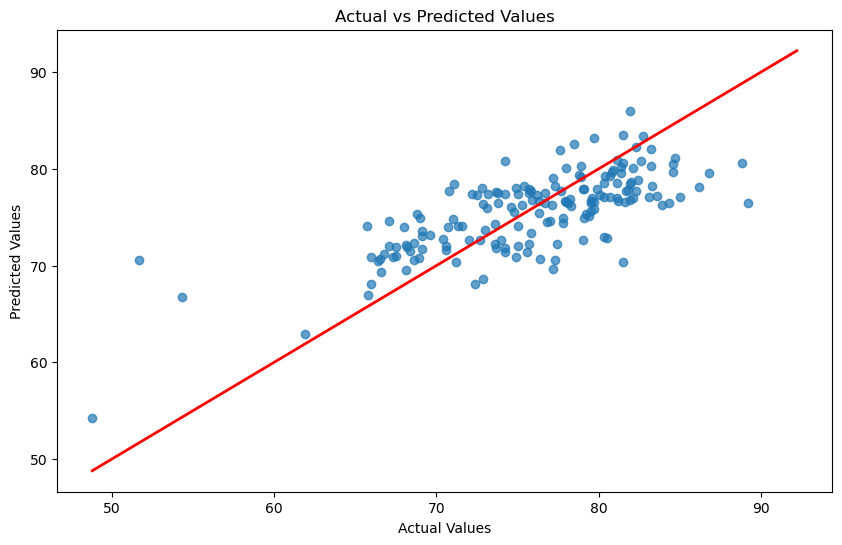

In [156]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your original dataset and 'data_midwest' is filtered data for the Midwest region
# Define the target variable and predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Percent_families_in_poverty', 
    'Womens_median_earnings', 
    'Percent_Asian', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_midwest, return_type='dataframe')

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store performance metrics
mse_list = []
mae_list = []
r2_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the regression model
    model = sm.OLS(y_train, X_train).fit()
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Calculate average metrics across all folds
avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)
avg_r2 = np.mean(r2_list)

# Print the average performance metrics
print(f'Average Mean Squared Error: {avg_mse}')
print(f'Average Mean Absolute Error: {avg_mae}')
print(f'Average R-squared: {avg_r2}')

# Plot predicted vs actual values for the last fold
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.show()


In [160]:
# Load the dataset
file_path =  r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx'
data = pd.read_excel(file_path)

In [161]:
#northeast & South Model performance

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def model_performance(data, region_name):
    # Filter data for the specified region
    data_region = data[data['Region'] == region_name]

    # Define the target variable and predictors
    target = 'Womens_labor_force_participation_rate'
    predictors = [
        'Median_family_income', 
        'Percent_families_in_poverty',  
        'Womens_median_earnings',         
        'Percent_Asian',                   
        'Percent_Black',                   
        'Percent_Hispanic',  
        'Percent_White',                   
        'Infant_center_based_cost_pct', 
        'Infant_home_based_cost_pct', 
        'Toddler_center_based_cost_pct', 
        'Toddler_home_based_cost_pct', 
        'Preschool_center_based_cost_pct', 
        'Preschool_home_based_cost_pct', 
        'School_age_center_based_cost_pct', 
        'School_age_home_based_cost_pct'
    ]

    # Check for the presence of all required columns
    missing_columns = [col for col in predictors if col not in data_region.columns]
    if missing_columns:
        print(f"Missing columns in the dataset for region {region_name}: {missing_columns}")
        return

    # Combine all predictors into a formula
    formula = target + ' ~ ' + ' + '.join(predictors)

    # Initialize lists to store metrics
    mse_list = []
    mae_list = []
    r2_list = []

    # Define cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(data_region):
        train_data = data_region.iloc[train_index]
        test_data = data_region.iloc[test_index]

        # Use patsy to create design matrices
        y_train, X_train = dmatrices(formula, train_data, return_type='dataframe')
        y_test, X_test = dmatrices(formula, test_data, return_type='dataframe')

        # Fit the regression model
        model = sm.OLS(y_train, X_train).fit()

        # Predict
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_list.append(mse)
        mae_list.append(mae)
        r2_list.append(r2)

    # Calculate average metrics
    avg_mse = np.mean(mse_list)
    avg_mae = np.mean(mae_list)
    avg_r2 = np.mean(r2_list)

    print(f"Average Mean Squared Error for {region_name}: {avg_mse}")
    print(f"Average Mean Absolute Error for {region_name}: {avg_mae}")
    print(f"Average R-squared for {region_name}: {avg_r2}")

    # Plot Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for {region_name}')
    plt.show()

# Load the data
data = pd.read_excel(r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx')

# Validate model performance for the Northeast region
model_performance(data, 'Northeast')

# Validate model performance for the South region
model_performance(data, 'South')


Missing columns in the dataset for region Northeast: ['Median_family_income', 'Percent_families_in_poverty', 'Womens_median_earnings', 'Percent_Asian', 'Percent_Black', 'Percent_Hispanic', 'Percent_White', 'Infant_center_based_cost_pct', 'Infant_home_based_cost_pct', 'Toddler_center_based_cost_pct', 'Toddler_home_based_cost_pct', 'Preschool_center_based_cost_pct', 'Preschool_home_based_cost_pct', 'School_age_center_based_cost_pct', 'School_age_home_based_cost_pct']
Missing columns in the dataset for region South: ['Median_family_income', 'Percent_families_in_poverty', 'Womens_median_earnings', 'Percent_Asian', 'Percent_Black', 'Percent_Hispanic', 'Percent_White', 'Infant_center_based_cost_pct', 'Infant_home_based_cost_pct', 'Toddler_center_based_cost_pct', 'Toddler_home_based_cost_pct', 'Preschool_center_based_cost_pct', 'Preschool_home_based_cost_pct', 'School_age_center_based_cost_pct', 'School_age_home_based_cost_pct']


In [ ]:
WEST REGION MODEL

In [162]:
#MODEL 1

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the West region
data_west = data[data['Region'] == 'West']

# Rename columns to avoid spaces and special characters
data_west = data_west.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Verify the column names
print(data_west.columns)

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Percent_Black',                   
    'Percent_Hispanic',  
    'Percent_White',                   
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Toddler_home_based_cost_pct', 
    'Preschool_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct', 
    'School_age_home_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_west, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the West region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the West region")
print(vif)


Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_center_based_cost_pct', 'Infant home-based price: 2018 ($)',
       'Infant_home_based_cost_pct', 'Toddler center-based price: 2018 ($)',
       'Toddler_center_based_cost_pct', 'Toddler home-based price: 2018 ($)',
       'Toddler_home_based_cost_pct', 'Preschool center-based price: 2018 ($)',
       'Preschool_center_based_cost_pct',
       'Preschool home-based price: 2018 ($)', 'Preschool_home_based_cost_pct',
       'School-age center-based price: 2018 ($)',
       'School_age_center_based_cost_pct',
       'School-age home-based price: 2018 ($)',
       'School_age_home_based_cost_pct',
       'Womens_labor_force_participation_rate', 'Womens_median_earnings',
       'Median_family_income', 'Percent_families_in_poverty',
       'Total population', 'Percent_Asian', 'Percent_Black',
       'Percent_Hispanic', 'Percent_White'],
      dtype='obj

In [163]:
#MODEL 2

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the West region
data_west = data[data['Region'] == 'West']

# Rename columns to avoid spaces and special characters
data_west = data_west.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Verify the column names
print(data_west.columns)

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Percent_Black',                   
    'Percent_Hispanic',  
    'Percent_White',                   
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'Toddler_home_based_cost_pct', 
    'Preschool_center_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct', 
    'School_age_home_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_west, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the West region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the West region")
print(vif)

# Remove highly collinear variables and fit the model again
# Remove variables with VIF > 10, starting with the highest
variables_to_keep = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Percent_Asian',                   
    'Percent_Hispanic',  
    'Percent_White',                   
    'Infant_center_based_cost_pct', 
    'Toddler_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine kept predictors into a formula
refined_formula = target + ' ~ ' + ' + '.join(variables_to_keep)

# Use patsy to create design matrices
y, X = dmatrices(refined_formula, data_west, return_type='dataframe')

# Fit the regression model
refined_model = sm.OLS(y, X).fit()

# Print the refined model summary
print(f'Refined Regression Analysis for Women Labor Participation Rate in the West region')
print(refined_model.summary())

# Calculate VIF for each predictor in the refined model
refined_vif = pd.DataFrame()
refined_vif["Variable"] = X.columns
refined_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nRefined Variance Inflation Factors (VIF) for the West region")
print(refined_vif)


Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_center_based_cost_pct', 'Infant home-based price: 2018 ($)',
       'Infant_home_based_cost_pct', 'Toddler center-based price: 2018 ($)',
       'Toddler_center_based_cost_pct', 'Toddler home-based price: 2018 ($)',
       'Toddler_home_based_cost_pct', 'Preschool center-based price: 2018 ($)',
       'Preschool_center_based_cost_pct',
       'Preschool home-based price: 2018 ($)', 'Preschool_home_based_cost_pct',
       'School-age center-based price: 2018 ($)',
       'School_age_center_based_cost_pct',
       'School-age home-based price: 2018 ($)',
       'School_age_home_based_cost_pct',
       'Womens_labor_force_participation_rate', 'Womens_median_earnings',
       'Median_family_income', 'Percent_families_in_poverty',
       'Total population', 'Percent_Asian', 'Percent_Black',
       'Percent_Hispanic', 'Percent_White'],
      dtype='obj

In [164]:
#MODEL 3

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the West region
data_west = data[data['Region'] == 'West']

# Rename columns to avoid spaces and special characters
data_west = data_west.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Verify the column names
print(data_west.columns)

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',  
    'Infant_center_based_cost_pct', 
    'Infant_home_based_cost_pct', 
    'Preschool_home_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_west, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the West region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the West region")
print(vif)


Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_center_based_cost_pct', 'Infant home-based price: 2018 ($)',
       'Infant_home_based_cost_pct', 'Toddler center-based price: 2018 ($)',
       'Toddler_center_based_cost_pct', 'Toddler home-based price: 2018 ($)',
       'Toddler_home_based_cost_pct', 'Preschool center-based price: 2018 ($)',
       'Preschool_center_based_cost_pct',
       'Preschool home-based price: 2018 ($)', 'Preschool_home_based_cost_pct',
       'School-age center-based price: 2018 ($)',
       'School_age_center_based_cost_pct',
       'School-age home-based price: 2018 ($)',
       'School_age_home_based_cost_pct',
       'Womens_labor_force_participation_rate', 'Womens_median_earnings',
       'Median_family_income', 'Percent_families_in_poverty',
       'Total population', 'Percent_Asian', 'Percent_Black',
       'Percent_Hispanic', 'Percent_White'],
      dtype='obj

In [165]:
#MODEL 4

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your original dataset
# Filter data for the West region
data_west = data[data['Region'] == 'West']

# Rename columns to avoid spaces and special characters
data_west = data_west.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'Infant home-based price as share of family income: 2018 (%)': 'Infant_home_based_cost_pct',
    'Toddler center-based price as share of family income: 2018 (%)': 'Toddler_center_based_cost_pct',
    'Toddler home-based price as share of family income: 2018 (%)': 'Toddler_home_based_cost_pct',
    'Preschool center-based price as share of family income: 2018 (%)': 'Preschool_center_based_cost_pct',
    'Preschool home-based price as share of family income: 2018 (%)': 'Preschool_home_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct',
    'School-age home-based price as share of family income: 2018 (%)': 'School_age_home_based_cost_pct'
})

# Verify the column names
print(data_west.columns)

# Define the target variable and final predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',  
    'Infant_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_west, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the West region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the West region")
print(vif)


Index(['State name', 'Region', 'County name', 'County Size',
       'County FIPS code', 'Infant center-based price: 2018 ($)',
       'Infant_center_based_cost_pct', 'Infant home-based price: 2018 ($)',
       'Infant_home_based_cost_pct', 'Toddler center-based price: 2018 ($)',
       'Toddler_center_based_cost_pct', 'Toddler home-based price: 2018 ($)',
       'Toddler_home_based_cost_pct', 'Preschool center-based price: 2018 ($)',
       'Preschool_center_based_cost_pct',
       'Preschool home-based price: 2018 ($)', 'Preschool_home_based_cost_pct',
       'School-age center-based price: 2018 ($)',
       'School_age_center_based_cost_pct',
       'School-age home-based price: 2018 ($)',
       'School_age_home_based_cost_pct',
       'Womens_labor_force_participation_rate', 'Womens_median_earnings',
       'Median_family_income', 'Percent_families_in_poverty',
       'Total population', 'Percent_Asian', 'Percent_Black',
       'Percent_Hispanic', 'Percent_White'],
      dtype='obj

Average Mean Squared Error: 25.10199709147817
Average Mean Absolute Error: 3.8892508481277277
Average R-squared: 0.33588836418642687


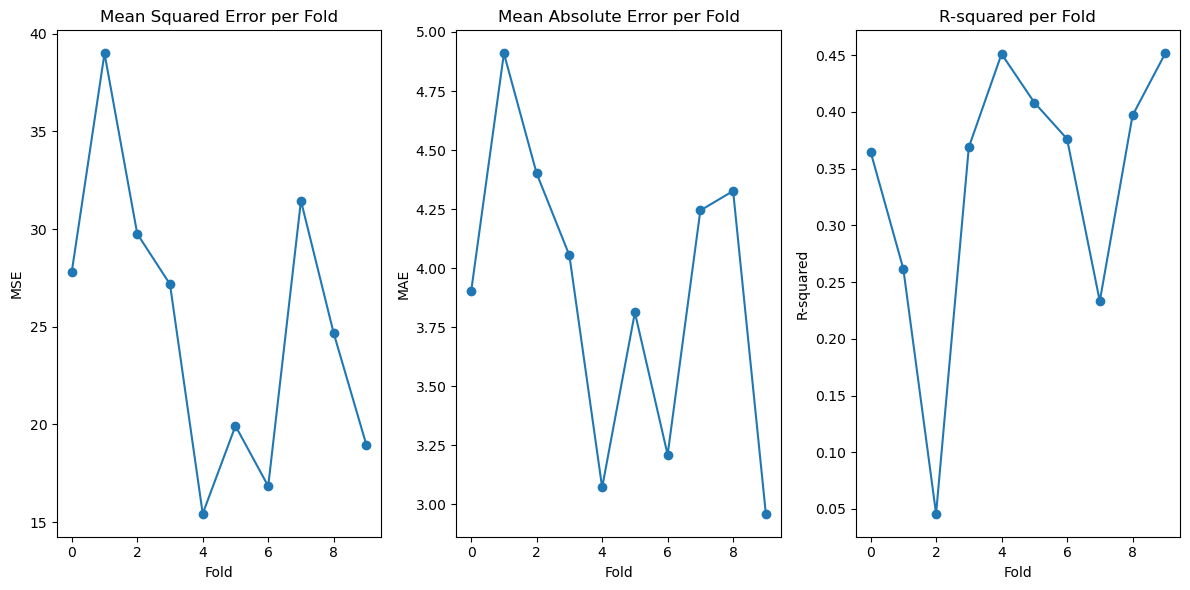

In [166]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
data = pd.read_excel(r'C:\Users\ask4d\OneDrive\Desktop\Baypath University\Summer 2024\Dataset\Original_2018 Childcare_Data_Final Analysis.xlsx', engine='openpyxl')

# Filter data for the West region
data_west = data[data['Region'] == 'West']

# Rename columns to avoid spaces and special characters
data_west = data_west.rename(columns={
    'Percent of families in poverty (%)': 'Percent_families_in_poverty',
    "Women's labor force participation rate (%)": 'Womens_labor_force_participation_rate',
    'Women\'s median earnings ($)': 'Womens_median_earnings',
    'Median family income ($)': 'Median_family_income',
    'Percent Asian (%)': 'Percent_Asian',
    'Percent Black (%)': 'Percent_Black',
    'Percent Hispanic (of any race) (%)': 'Percent_Hispanic',
    'Percent White (%)': 'Percent_White',
    'Infant center-based price as share of family income: 2018 (%)': 'Infant_center_based_cost_pct',
    'School-age center-based price as share of family income: 2018 (%)': 'School_age_center_based_cost_pct'
})

# Define the target variable and predictors
target = 'Womens_labor_force_participation_rate'
predictors = [
    'Median_family_income', 
    'Percent_families_in_poverty',  
    'Womens_median_earnings',         
    'Infant_center_based_cost_pct', 
    'School_age_center_based_cost_pct'
]

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Prepare the cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mse_values = []
mae_values = []
r2_values = []

# Perform cross-validation
for train_index, test_index in kf.split(data_west):
    train_data = data_west.iloc[train_index]
    test_data = data_west.iloc[test_index]

    # Use patsy to create design matrices
    y_train, X_train = dmatrices(formula, train_data, return_type='dataframe')
    y_test, X_test = dmatrices(formula, test_data, return_type='dataframe')

    # Fit the model
    model = sm.OLS(y_train, X_train).fit()

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Calculate average performance metrics
average_mse = sum(mse_values) / len(mse_values)
average_mae = sum(mae_values) / len(mae_values)
average_r2 = sum(r2_values) / len(r2_values)

print(f"Average Mean Squared Error: {average_mse}")
print(f"Average Mean Absolute Error: {average_mae}")
print(f"Average R-squared: {average_r2}")

# Plot the performance metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(mse_values, marker='o')
plt.title('Mean Squared Error per Fold')
plt.xlabel('Fold')
plt.ylabel('MSE')

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(mae_values, marker='o')
plt.title('Mean Absolute Error per Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')

# Plot R-squared
plt.subplot(1, 3, 3)
plt.plot(r2_values, marker='o')
plt.title('R-squared per Fold')
plt.xlabel('Fold')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


In [123]:
# Filter data for the West region
data_west = data[data['Region'] == 'West']

# Define the target variable and best predictors
target = 'Womens_labor_force_participation_rate'
predictors = ['Median_family_income', 'Womens_median_earnings', 'Percent_White']

# Combine all predictors into a formula
formula = target + ' ~ ' + ' + '.join(predictors)

# Use patsy to create design matrices
y, X = dmatrices(formula, data_west, return_type='dataframe')

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(f'Regression Analysis for Women Labor Participation Rate in the West region')
print(model.summary())

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF) for the West region")
print(vif)


Regression Analysis for Women Labor Participation Rate in the West region
                                      OLS Regression Results                                     
Dep. Variable:     Womens_labor_force_participation_rate   R-squared:                       0.312
Model:                                               OLS   Adj. R-squared:                  0.306
Method:                                    Least Squares   F-statistic:                     46.32
Date:                                   Thu, 20 Jun 2024   Prob (F-statistic):           1.04e-24
Time:                                           19:59:55   Log-Likelihood:                -947.59
No. Observations:                                    310   AIC:                             1903.
Df Residuals:                                        306   BIC:                             1918.
Df Model:                                              3                                         
Covariance Type:                            